# Generate Species for Low Temperature Pathways

The goal of this notebook is to allow you to generate all the species that would occur by systematically applying known low-temperature pathways to a starting fuel molecule(s).

You might do this to generate species that you then put into an RMG input file, to help RMG find the low temperature pathways. An RMG input file species block is generated at the end, to facilitate this.

These are the pathways, from https://doi.org/10.1016/j.combustflame.2015.07.005
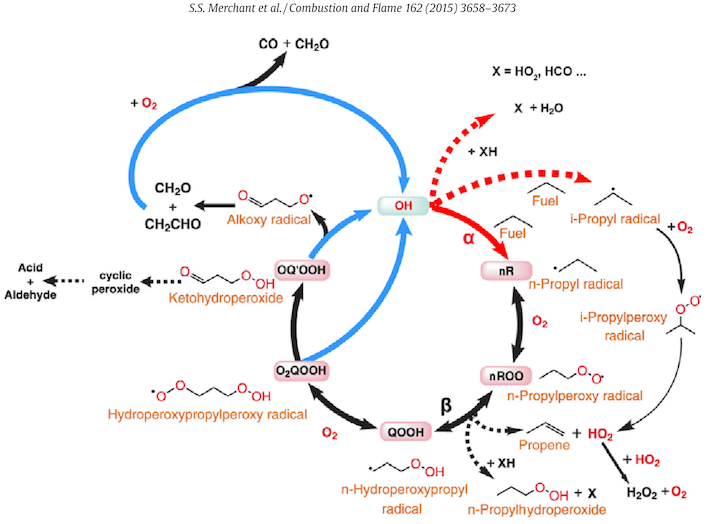

In [1]:
import sys, os
sys.path.insert(0,os.path.expandvars("$RMGpy"))

In [2]:
from rmgpy.rmg.main import RMG
from rmgpy.rmg.model import CoreEdgeReactionModel
from rmgpy import settings
from IPython.display import display
from arkane.output import prettify

RDKit WARNING: [12:01:59] Enabling RDKit 2019.09.1 jupyter extensions


Declare database variables here by changing the thermo and reaction libraries. These are not actually used.

In [3]:
database = """
database(
    thermoLibraries = ['BurkeH2O2','primaryThermoLibrary','DFT_QCI_thermo','CBS_QB3_1dHR'],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsDepositories = ['training'],
    kineticsFamilies = [
        'H_Abstraction',
        'R_Recombination',
        'R_Addition_MultipleBond',
        'intra_H_migration',
        'HO2_Elimination_from_PeroxyRadical',
        'intra_OH_migration',
    ],
    kineticsEstimator = 'rate rules',
)

options(
    verboseComments=True,  # Set to True for detailed kinetics comments
)
"""


Just put O2 in the model for now

In [4]:
speciesList = """
species(
    label='O2',
    reactive=True,
    structure=SMILES("[O][O]")
)

"""



In [5]:
# Write input file to disk
os.makedirs('temp', exist_ok=True)
inputFile = open('temp/input.py','w')
inputFile.write(database)
inputFile.write(speciesList)
inputFile.close()

In [6]:
# initialize RMG instance
# This does all the hard work of loading the databases etc.
# which can take a while
from rmgpy.tools.generatereactions import RMG
kwargs = {
            'restart': '',
            'walltime': '00:00:00:00',
            'kineticsdatastore': True
    }
rmg = RMG(input_file='temp/input.py', output_directory='temp')

rmg.initialize(**kwargs)


/home/ajulu.c/.local/lib/python3.7/site-packages/scipy/optimize/optimize.py:1826: LinAlgWarning: Ill-conditioned matrix (rcond=9.79183e-18): result may not be accurate.
  fu = func(x, *args)
/home/ajulu.c/.local/lib/python3.7/site-packages/scipy/optimize/optimize.py:1826: LinAlgWarning: Ill-conditioned matrix (rcond=5.9437e-17): result may not be accurate.
  fu = func(x, *args)


In [7]:
from rmgpy.molecule import Molecule

In [8]:
from collections import defaultdict
molecules = defaultdict(set)

def union(*args):
    out = set()
    for a in args:
        out.update(molecules[a])
    return out

# Put your fuel molecule(s) here:

In [9]:
# you may have more than one if you wish, just repeat this line
molecules['fuel'].add(Molecule(smiles='CCCC1CCCCC1'))

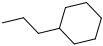

In [10]:
for m in molecules['fuel']:
    display(m)

# ☝️☝️☝️☝️☝️☝️☝️☝️

In [11]:
molecules['H'].add(Molecule(smiles='[H]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")}})

In [12]:
union('fuel','H')

{Molecule(smiles="[H]"), Molecule(smiles="CCCC1CCCCC1")}

[H] + CCCC1CCCCC1 <=> [H][H] + CCC[C]1CCCCC1


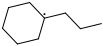

[H] + CCCC1CCCCC1 <=> [H][H] + CC[CH]C1CCCCC1


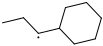

[H] + CCCC1CCCCC1 <=> [H][H] + CCCC1[CH]CCCC1


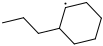

[H] + CCCC1CCCCC1 <=> [H][H] + CCCC1C[CH]CCC1


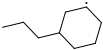

[H] + CCCC1CCCCC1 <=> [H][H] + CCCC1CC[CH]CC1


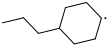

[H] + CCCC1CCCCC1 <=> [H][H] + C[CH]CC1CCCCC1


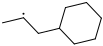

[H] + CCCC1CCCCC1 <=> [H][H] + [CH2]CCC1CCCCC1


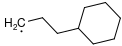

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")}})

In [13]:
# React fuel with H via H_Abstraction to get the radicals R

h = list(molecules['H'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, h), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[1].molecule[0]
        display(m)
        molecules['R'].add(m)
molecules

In [14]:
molecules['c3h7'].add(Molecule(smiles='[CH2]CC'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")}})

In [15]:
molecules['c6h11'].add(Molecule(smiles='[CH]1CCCCC1'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")}})

In [16]:
union('c3h7','c6h11')

{Molecule(smiles="[CH2]CC"), Molecule(smiles="[CH]1CCCCC1")}

[CH2]CC + [CH]1CCCCC1 <=> CCCC1CCCCC1


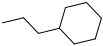

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")}})

In [17]:
# Unimolecular decomposition between the carbon-carbon bonds to get a alkyl radical and cyclic radical
c3h7 = list(molecules['c3h7'])[0]
for s in molecules['c6h11']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, c3h7), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['cyclic_rad'].add(m)
molecules

In [18]:
molecules['c7h13'].add(Molecule(smiles='[CH2]C1CCCCC1'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")}})

In [19]:
Molecule(smiles='[CH2]C1CCCCC1').generate_resonance_structures()

[Molecule(smiles="[CH2]C1CCCCC1")]

In [20]:
molecules['c2h5'].add(Molecule(smiles='C[CH2]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")}})

In [21]:
union('c7h13', 'c2h5')

{Molecule(smiles="C[CH2]"), Molecule(smiles="[CH2]C1CCCCC1")}

C[CH2] + [CH2]C1CCCCC1 <=> CCCC1CCCCC1


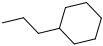

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")}})

In [22]:
# Unimolecular decomposition between the carbon-carbon bonds to get a alkyl radical and cyclic radical
c2h5 = list(molecules['c2h5'])[0]
for s in molecules['c7h13']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, c2h5), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['cyclic_rad2'].add(m)
molecules

In [23]:
molecules['ch3'].add(Molecule(smiles='[CH3]'))
molecules

molecules['c8h15'].add(Molecule(smiles='C1CCCCC1C[CH2]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")}})

In [24]:
union('c8h15', 'ch3')

{Molecule(smiles="[CH3]"), Molecule(smiles="[CH2]CC1CCCCC1")}

[CH3] + [CH2]CC1CCCCC1 <=> CCCC1CCCCC1


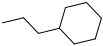

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")}})

In [25]:
# Unimolecular decomposition between the carbon-carbon bonds to get a alkyl radical and cyclic radical
ch3 = list(molecules['ch3'])[0]
for s in molecules['c8h15']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, ch3), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['cyclic_rad3'].add(m)
molecules

In [26]:
molecules['pch_bi_rad'].add(Molecule(smiles='[CH2]CCCC[CH]CCC'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [27]:
# Unimolecular initiation involving the breaking of the cyclic ring to form biradicals 
pch_bi_rad = list(molecules['pch_bi_rad'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, pch_bi_rad), only_families='Birad_recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['n-pch_bi_rad'].add(m)
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [28]:
molecules['nonene'].add(Molecule(smiles='CCCC=CCCCC'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [29]:
# Unimolecular initiation involving the breaking of the cyclic ring to form biradicals then disproportionation to form acyclic nonene
nonene = list(molecules['nonene'])[0]
for s in molecules['pch_bi_rad']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, nonene), only_families='Intra_Disproportionation')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['propenyl'].add(m)
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [30]:
molecules['O'].add(Molecule(smiles='[O]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [31]:
# React fuel (n-pch) with O to get OH radicals
o = list(molecules['O'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, o), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['RO'].add(m)
molecules

[O] + CCCC1CCCCC1 <=> [OH] + CCC[C]1CCCCC1


[O] + CCCC1CCCCC1 <=> [OH] + CC[CH]C1CCCCC1


[O] + CCCC1CCCCC1 <=> [OH] + CCCC1[CH]CCCC1


[O] + CCCC1CCCCC1 <=> [OH] + CCCC1C[CH]CCC1


[O] + CCCC1CCCCC1 <=> [OH] + CCCC1CC[CH]CC1


[O] + CCCC1CCCCC1 <=> [OH] + C[CH]CC1CCCCC1


[O] + CCCC1CCCCC1 <=> [OH] + [CH2]CCC1CCCCC1


defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [32]:
molecules['O2'].add(Molecule(smiles='[O][O]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [33]:
# React R with O2 to get the ROO
o2 = list(molecules['O2'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, o2), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['ROO'].add(m)
molecules

[O][O] + CCCC1CCCCC1 <=> [O]O + CCC[C]1CCCCC1


[O][O] + CCCC1CCCCC1 <=> [O]O + CC[CH]C1CCCCC1


[O][O] + CCCC1CCCCC1 <=> [O]O + CCCC1[CH]CCCC1


[O][O] + CCCC1CCCCC1 <=> [O]O + CCCC1C[CH]CCC1


[O][O] + CCCC1CCCCC1 <=> [O]O + CCCC1CC[CH]CC1


[O][O] + CCCC1CCCCC1 <=> [O]O + C[CH]CC1CCCCC1


[O][O] + CCCC1CCCCC1 <=> [O]O + [CH2]CCC1CCCCC1


defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [34]:
molecules['OH'].add(Molecule(smiles='[OH]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [35]:
# React fuel with OH to get the cycloalkyl radicals and water
oh = list(molecules['OH'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, oh), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['RH2O'].add(m)
molecules

[OH] + CCCC1CCCCC1 <=> O + CCC[C]1CCCCC1


[OH] + CCCC1CCCCC1 <=> O + CC[CH]C1CCCCC1


[OH] + CCCC1CCCCC1 <=> O + CCCC1[CH]CCCC1


[OH] + CCCC1CCCCC1 <=> O + CCCC1C[CH]CCC1


[OH] + CCCC1CCCCC1 <=> O + CCCC1CC[CH]CC1


[OH] + CCCC1CCCCC1 <=> O + C[CH]CC1CCCCC1


[OH] + CCCC1CCCCC1 <=> O + [CH2]CCC1CCCCC1


defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [36]:
molecules['HO2'].add(Molecule(smiles='O[O]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [37]:
# React R with O2 to get the ROO
ho2 = list(molecules['HO2'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, ho2), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['RH2O2'].add(m)
molecules

[O]O + CCCC1CCCCC1 <=> OO + CCC[C]1CCCCC1


[O]O + CCCC1CCCCC1 <=> OO + CC[CH]C1CCCCC1


[O]O + CCCC1CCCCC1 <=> OO + CCCC1[CH]CCCC1


[O]O + CCCC1CCCCC1 <=> OO + CCCC1C[CH]CCC1


[O]O + CCCC1CCCCC1 <=> OO + CCCC1CC[CH]CC1


[O]O + CCCC1CCCCC1 <=> OO + C[CH]CC1CCCCC1


[O]O + CCCC1CCCCC1 <=> OO + [CH2]CCC1CCCCC1


defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [38]:
# React fuel with CH3 to get CH4 and a propylcyclohexane radical c9h17 using h abstraction
ch3 = list(molecules['ch3'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, ch3), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['RCH4'].add(m)
molecules

[CH3] + CCCC1CCCCC1 <=> C + CCC[C]1CCCCC1


[CH3] + CCCC1CCCCC1 <=> C + CC[CH]C1CCCCC1


[CH3] + CCCC1CCCCC1 <=> C + CCCC1[CH]CCCC1


[CH3] + CCCC1CCCCC1 <=> C + CCCC1C[CH]CCC1


[CH3] + CCCC1CCCCC1 <=> C + CCCC1CC[CH]CC1


[CH3] + CCCC1CCCCC1 <=> C + C[CH]CC1CCCCC1


[CH3] + CCCC1CCCCC1 <=> C + [CH2]CCC1CCCCC1


defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [39]:
molecules['pch_rad_1'].add(Molecule(smiles='[CH2]CCC1CCCCC1'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

CCC[C]1CCCCC1 <=> CC[CH]C1CCCCC1


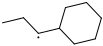

CCC[C]1CCCCC1 <=> CCCC1[CH]CCCC1


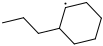

CCC[C]1CCCCC1 <=> C[CH]CC1CCCCC1


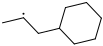

CCC[C]1CCCCC1 <=> CCCC1C[CH]CCC1


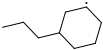

CCC[C]1CCCCC1 <=> CCCC1CC[CH]CC1


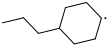

CCC[C]1CCCCC1 <=> [CH2]CCC1CCCCC1


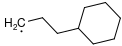

CCCC1CC[CH]CC1 <=> CCCC1C[CH]CCC1


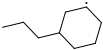

CCCC1CC[CH]CC1 <=> CCCC1[CH]CCCC1


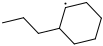

CCCC1CC[CH]CC1 <=> CCC[C]1CCCCC1


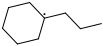

CCCC1CC[CH]CC1 <=> CC[CH]C1CCCCC1


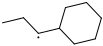

CCCC1CC[CH]CC1 <=> C[CH]CC1CCCCC1


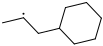

CCCC1CC[CH]CC1 <=> [CH2]CCC1CCCCC1


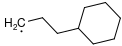

C[CH]CC1CCCCC1 <=> CC[CH]C1CCCCC1


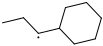

C[CH]CC1CCCCC1 <=> [CH2]CCC1CCCCC1


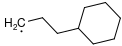

C[CH]CC1CCCCC1 <=> CCC[C]1CCCCC1


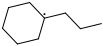

C[CH]CC1CCCCC1 <=> CCCC1[CH]CCCC1


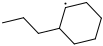

C[CH]CC1CCCCC1 <=> CCCC1C[CH]CCC1


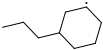

C[CH]CC1CCCCC1 <=> CCCC1CC[CH]CC1


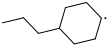

[CH2]CCC1CCCCC1 <=> C[CH]CC1CCCCC1


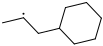

[CH2]CCC1CCCCC1 <=> CC[CH]C1CCCCC1


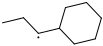

[CH2]CCC1CCCCC1 <=> CCC[C]1CCCCC1


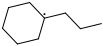

[CH2]CCC1CCCCC1 <=> CCCC1[CH]CCCC1


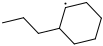

[CH2]CCC1CCCCC1 <=> CCCC1C[CH]CCC1


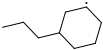

[CH2]CCC1CCCCC1 <=> CCCC1CC[CH]CC1


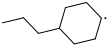

CCCC1C[CH]CCC1 <=> CCCC1[CH]CCCC1


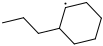

CCCC1C[CH]CCC1 <=> CCCC1CC[CH]CC1


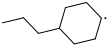

CCCC1C[CH]CCC1 <=> CCC[C]1CCCCC1


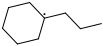

CCCC1C[CH]CCC1 <=> CC[CH]C1CCCCC1


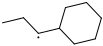

CCCC1C[CH]CCC1 <=> CCCC1[CH]CCCC1


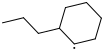

CCCC1C[CH]CCC1 <=> C[CH]CC1CCCCC1


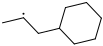

CCCC1C[CH]CCC1 <=> [CH2]CCC1CCCCC1


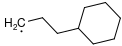

CC[CH]C1CCCCC1 <=> CCC[C]1CCCCC1


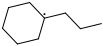

CC[CH]C1CCCCC1 <=> C[CH]CC1CCCCC1


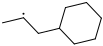

CC[CH]C1CCCCC1 <=> CCCC1[CH]CCCC1


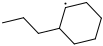

CC[CH]C1CCCCC1 <=> [CH2]CCC1CCCCC1


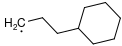

CC[CH]C1CCCCC1 <=> CCCC1C[CH]CCC1


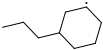

CC[CH]C1CCCCC1 <=> CCCC1CC[CH]CC1


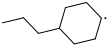

CCCC1[CH]CCCC1 <=> CCC[C]1CCCCC1


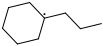

CCCC1[CH]CCCC1 <=> CCCC1C[CH]CCC1


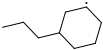

CCCC1[CH]CCCC1 <=> CC[CH]C1CCCCC1


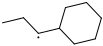

CCCC1[CH]CCCC1 <=> CCCC1CC[CH]CC1


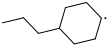

CCCC1[CH]CCCC1 <=> C[CH]CC1CCCCC1


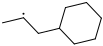

CCCC1[CH]CCCC1 <=> CCCC1C[CH]CCC1


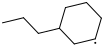

CCCC1[CH]CCCC1 <=> [CH2]CCC1CCCCC1


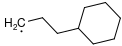

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [40]:
# Isomerize cyclic_rad 
for s in molecules['R']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, ), only_families='intra_H_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['pch_radicals'].add(m)
molecules

In [40]:
# # β-scission decompositions involving the breaking of a C-H bond on the alkyl chain

# molecules['d-pch'].add(Molecule(smiles='C=CCC1CCCCC1'))
# molecules

In [44]:
# β-scission decompositions involving the breaking of a C-H bond on the alkyl chain
h = list(molecules['H'])[0]
for s in molecules['R']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, h), only_families='R_Addition_MultipleBond')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['pch_rad'].add(m)
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

CCCC1(O[O])CCCCC1 <=> CC[CH]C1(OO)CCCCC1


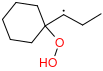

CCCC1(O[O])CCCCC1 <=> CCCC1(OO)[CH]CCCC1


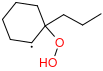

CCCC1(O[O])CCCCC1 <=> C[CH]CC1(OO)CCCCC1


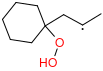

CCCC1(O[O])CCCCC1 <=> CCCC1(OO)C[CH]CCC1


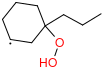

CCCC1(O[O])CCCCC1 <=> [CH2]CCC1(OO)CCCCC1


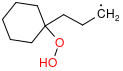

CCCC1(O[O])CCCCC1 <=> CCCC1(OO)CC[CH]CC1


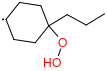

CCC(O[O])C1CCCCC1 <=> CC[C](OO)C1CCCCC1


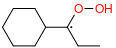

CCC(O[O])C1CCCCC1 <=> CCC(OO)[C]1CCCCC1


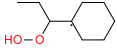

CCC(O[O])C1CCCCC1 <=> C[CH]C(OO)C1CCCCC1


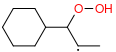

CCC(O[O])C1CCCCC1 <=> CCC(OO)C1[CH]CCCC1


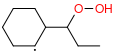

CCC(O[O])C1CCCCC1 <=> [CH2]CC(OO)C1CCCCC1


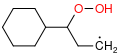

CCC(O[O])C1CCCCC1 <=> CCC(OO)C1C[CH]CCC1


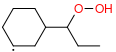

CCC(O[O])C1CCCCC1 <=> CCC(OO)C1CC[CH]CC1


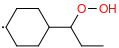

CCCC1CCCC(O[O])C1 <=> CCCC1CCC[C](OO)C1


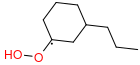

CCCC1CCCC(O[O])C1 <=> CCCC1[CH]C(OO)CCC1


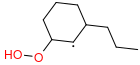

CCCC1CCCC(O[O])C1 <=> CCCC1CC[CH]C(OO)C1


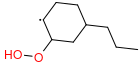

CCCC1CCCC(O[O])C1 <=> CCC[C]1CCCC(OO)C1


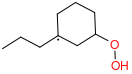

CCCC1CCCC(O[O])C1 <=> CCCC1C[CH]CC(OO)C1


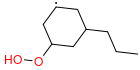

CCCC1CCCC(O[O])C1 <=> CC[CH]C1CCCC(OO)C1


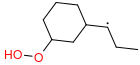

CCCC1CCCC(O[O])C1 <=> CCCC1[CH]CCC(OO)C1


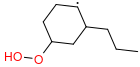

CCCC1CCCC(O[O])C1 <=> C[CH]CC1CCCC(OO)C1


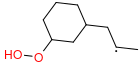

CCCC1CCCC(O[O])C1 <=> [CH2]CCC1CCCC(OO)C1


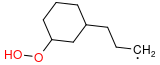

CCCC1CCCCC1O[O] <=> CCCC1CCCC[C]1OO


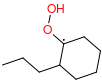

CCCC1CCCCC1O[O] <=> CCC[C]1CCCCC1OO


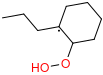

CCCC1CCCCC1O[O] <=> CCCC1CCC[CH]C1OO


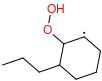

CCCC1CCCCC1O[O] <=> CC[CH]C1CCCCC1OO


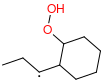

CCCC1CCCCC1O[O] <=> CCCC1[CH]CCCC1OO


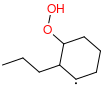

CCCC1CCCCC1O[O] <=> CCCC1CC[CH]CC1OO


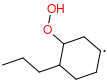

CCCC1CCCCC1O[O] <=> C[CH]CC1CCCCC1OO


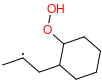

CCCC1CCCCC1O[O] <=> CCCC1C[CH]CCC1OO


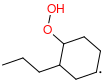

CCCC1CCCCC1O[O] <=> [CH2]CCC1CCCCC1OO


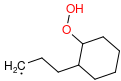

CC(CC1CCCCC1)O[O] <=> C[C](CC1CCCCC1)OO


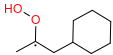

CC(CC1CCCCC1)O[O] <=> CC([CH]C1CCCCC1)OO


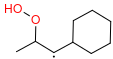

CC(CC1CCCCC1)O[O] <=> [CH2]C(CC1CCCCC1)OO


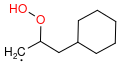

CC(CC1CCCCC1)O[O] <=> CC(C[C]1CCCCC1)OO


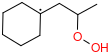

CC(CC1CCCCC1)O[O] <=> CC(CC1[CH]CCCC1)OO


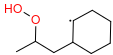

CC(CC1CCCCC1)O[O] <=> CC(CC1C[CH]CCC1)OO


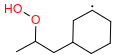

CC(CC1CCCCC1)O[O] <=> CC(CC1CC[CH]CC1)OO


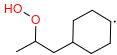

[O]OCCCC1CCCCC1 <=> OO[CH]CCC1CCCCC1


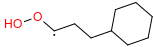

[O]OCCCC1CCCCC1 <=> OOC[CH]CC1CCCCC1


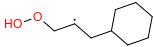

[O]OCCCC1CCCCC1 <=> OOCC[CH]C1CCCCC1


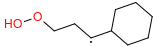

[O]OCCCC1CCCCC1 <=> OOCCC[C]1CCCCC1


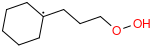

[O]OCCCC1CCCCC1 <=> OOCCCC1[CH]CCCC1


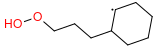

[O]OCCCC1CCCCC1 <=> OOCCCC1C[CH]CCC1


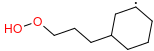

CCCC1CCC(O[O])CC1 <=> CCCC1CC[C](OO)CC1


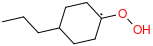

CCCC1CCC(O[O])CC1 <=> CCCC1C[CH]C(OO)CC1


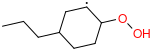

CCCC1CCC(O[O])CC1 <=> CCCC1[CH]CC(OO)CC1


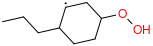

CCCC1CCC(O[O])CC1 <=> CCC[C]1CCC(OO)CC1


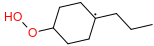

CCCC1CCC(O[O])CC1 <=> CC[CH]C1CCC(OO)CC1


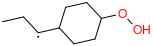

CCCC1CCC(O[O])CC1 <=> C[CH]CC1CCC(OO)CC1


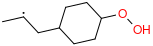

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'c3h7': {Molecule(smiles="[CH2]CC")},
             'c6h11': {Molecule(smiles="[CH]1CCCCC1")},
             'cyclic_rad': {Molecule(smiles="CCCC1CCCCC1")},
             'c7h13': {Molecule(smiles="[CH2]C1CCCCC1")},
             'c2h5': {Molecule(smiles="C[CH2]")},
             'cyclic_rad2': {Molecule(smiles="CCCC1CCCCC1")},
             'ch3': {Molecule(smiles="[CH3]")},
             'c8h15': {Molecule(smiles="[CH2]CC1CCCCC1")},
             'cyclic_rad3': {Molecule(smiles="CCCC1CCCCC1")},
             'pch_bi_rad': {

In [33]:
# Isomerize ROO to get QOOH
for s in molecules['ROO']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, ), only_families='intra_H_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['QOOH'].add(m)
molecules

[O][O] + CCCC1(OO)C[CH]CCC1 <=> CCCC1(OO)CCCC(O[O])C1


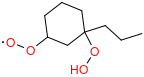

[O][O] + [CH2]CCC1(OO)CCCCC1 <=> [O]OCCCC1(OO)CCCCC1


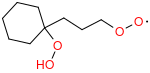

[O][O] + CCCC1(OO)CC[CH]CC1 <=> CCCC1(OO)CCC(O[O])CC1


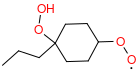

[O][O] + CCCC1CCCC[C]1OO <=> CCCC1CCCCC1(O[O])OO


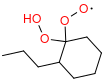

[O][O] + CCC[C]1CCCCC1OO <=> CCCC1(O[O])CCCCC1OO


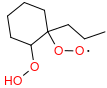

[O][O] + CCCC1CCC[CH]C1OO <=> CCCC1CCCC(O[O])C1OO


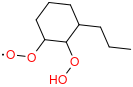

[O][O] + CC[CH]C1CCCCC1OO <=> CCC(O[O])C1CCCCC1OO


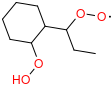

[O][O] + CCCC1[CH]CCCC1OO <=> CCCC1C(O[O])CCCC1OO


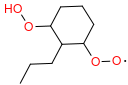

[O][O] + CCCC1CC[CH]CC1OO <=> CCCC1CCC(O[O])CC1OO


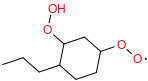

[O][O] + CCC(OO)C1[CH]CCCC1 <=> CCC(OO)C1CCCCC1O[O]


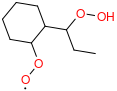

[O][O] + CC[C](OO)C1CCCCC1 <=> CCC(O[O])(OO)C1CCCCC1


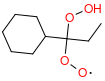

[O][O] + CCC(OO)[C]1CCCCC1 <=> CCC(OO)C1(O[O])CCCCC1


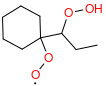

[O][O] + [CH2]CC(OO)C1CCCCC1 <=> [O]OCCC(OO)C1CCCCC1


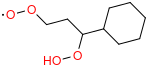

[O][O] + C[CH]C(OO)C1CCCCC1 <=> CC(O[O])C(OO)C1CCCCC1


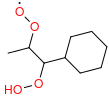

[O][O] + CCC(OO)C1C[CH]CCC1 <=> CCC(OO)C1CCCC(O[O])C1


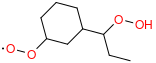

[O][O] + CCC(OO)C1CC[CH]CC1 <=> CCC(OO)C1CCC(O[O])CC1


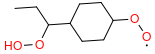

[O][O] + CC[CH]C1(OO)CCCCC1 <=> CCC(O[O])C1(OO)CCCCC1


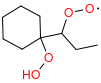

[O][O] + CCCC1(OO)[CH]CCCC1 <=> CCCC1(OO)CCCCC1O[O]


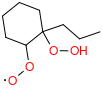

[O][O] + C[CH]CC1(OO)CCCCC1 <=> CC(CC1(OO)CCCCC1)O[O]


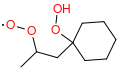

[O][O] + C[CH]CC1CCCCC1OO <=> CC(CC1CCCCC1OO)O[O]


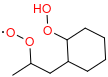

[O][O] + CCCC1C[CH]CCC1OO <=> CCCC1CC(O[O])CCC1OO


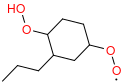

[O][O] + [CH2]CCC1CCCCC1OO <=> [O]OCCCC1CCCCC1OO


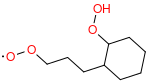

[O][O] + CCCC1CC[C](OO)CC1 <=> CCCC1CCC(O[O])(OO)CC1


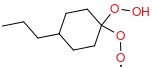

[O][O] + CCCC1C[CH]C(OO)CC1 <=> CCCC1CCC(OO)C(O[O])C1


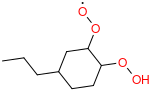

[O][O] + CCCC1[CH]CC(OO)CC1 <=> CCCC1CCC(OO)CC1O[O]


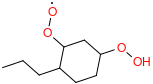

[O][O] + CCC[C]1CCC(OO)CC1 <=> CCCC1(O[O])CCC(OO)CC1


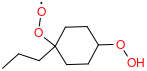

[O][O] + CC[CH]C1CCC(OO)CC1 <=> CCC(O[O])C1CCC(OO)CC1


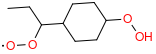

[O][O] + C[CH]CC1CCC(OO)CC1 <=> CC(CC1CCC(OO)CC1)O[O]


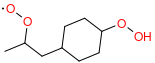

[O][O] + CCCC1CCC[C](OO)C1 <=> CCCC1CCCC(O[O])(OO)C1


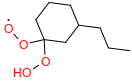

[O][O] + CCCC1[CH]C(OO)CCC1 <=> CCCC1CCCC(OO)C1O[O]


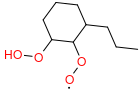

[O][O] + CCCC1CC[CH]C(OO)C1 <=> CCCC1CCC(O[O])C(OO)C1


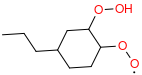

[O][O] + CCC[C]1CCCC(OO)C1 <=> CCCC1(O[O])CCCC(OO)C1


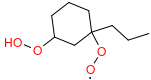

[O][O] + CCCC1C[CH]CC(OO)C1 <=> CCCC1CC(O[O])CC(OO)C1


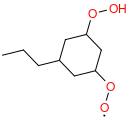

[O][O] + CC[CH]C1CCCC(OO)C1 <=> CCC(O[O])C1CCCC(OO)C1


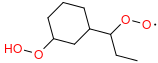

[O][O] + CCCC1[CH]CCC(OO)C1 <=> CCCC1CC(OO)CCC1O[O]


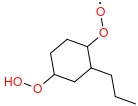

[O][O] + C[CH]CC1CCCC(OO)C1 <=> CC(CC1CCCC(OO)C1)O[O]


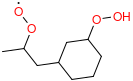

[O][O] + [CH2]CCC1CCCC(OO)C1 <=> [O]OCCCC1CCCC(OO)C1


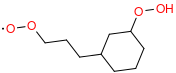

[O][O] + C[C](CC1CCCCC1)OO <=> CC(CC1CCCCC1)(O[O])OO


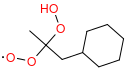

[O][O] + CC([CH]C1CCCCC1)OO <=> CC(OO)C(O[O])C1CCCCC1


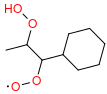

[O][O] + [CH2]C(CC1CCCCC1)OO <=> [O]OCC(CC1CCCCC1)OO


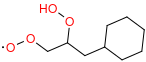

[O][O] + CC(C[C]1CCCCC1)OO <=> CC(CC1(O[O])CCCCC1)OO


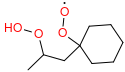

[O][O] + CC(CC1[CH]CCCC1)OO <=> CC(CC1CCCCC1O[O])OO


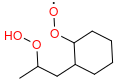

[O][O] + CC(CC1C[CH]CCC1)OO <=> CC(CC1CCCC(O[O])C1)OO


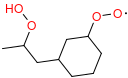

[O][O] + CC(CC1CC[CH]CC1)OO <=> CC(CC1CCC(O[O])CC1)OO


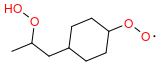

[O][O] + OO[CH]CCC1CCCCC1 <=> [O]OC(CCC1CCCCC1)OO


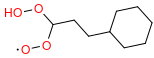

[O][O] + OOC[CH]CC1CCCCC1 <=> [O]OC(COO)CC1CCCCC1


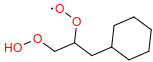

[O][O] + OOCC[CH]C1CCCCC1 <=> [O]OC(CCOO)C1CCCCC1


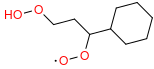

[O][O] + OOCCC[C]1CCCCC1 <=> [O]OC1(CCCOO)CCCCC1


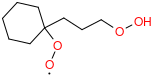

[O][O] + OOCCCC1[CH]CCCC1 <=> [O]OC1CCCCC1CCCOO


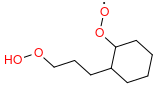

[O][O] + OOCCCC1C[CH]CCC1 <=> [O]OC1CCCC(CCCOO)C1


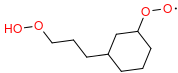

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCC1CCCCC1")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCC[C]1CCCCC1"),
              Molecule(smiles="CCCC1[CH]CCCC1"),
              Molecule(smiles="CCCC1C[CH]CCC1"),
              Molecule(smiles="CC[CH]C1CCCCC1"),
              Molecule(smiles="CCCC1CC[CH]CC1"),
              Molecule(smiles="C[CH]CC1CCCCC1"),
              Molecule(smiles="[CH2]CCC1CCCCC1")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CCC(O[O])C1CCCCC1"),
              Molecule(smiles="CCCC1(O[O])CCCCC1"),
              Molecule(smiles="CCCC1CCCCC1O[O]"),
              Molecule(smiles="CCCC1CCC(O[O])CC1"),
              Molecule(smiles="CCCC1CCCC(O[O])C1"),
              Molecule(smiles="CC(CC1CCCCC1)O[O]"),
              Molecule(smiles="[O]OCCCC1CCCCC1")},
             'QOOH': {Molecule(smiles="CCCC1(OO)C[CH]CCC1"),
              Molecule(smiles="[CH2]CCC1(OO)CCCCC1"),
    

In [17]:
# React QOOH with O2 to get the O2QOOH
o2 = list(molecules['O2'])[0]
for s in molecules['QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, o2), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['O2QOOH'].add(m)
molecules

In [18]:
# What next? OH + keto-hydroperoxide   or   HO2 + alkenyl hydroperoxide 

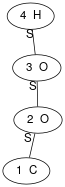

In [19]:
# Next we want O2QOOH on its way towards OH + keto-hydroperoxide
# but in elementary steps it goes via HOOQjOOH made by intra_H_migration
# we will need a template to filter out just these species
# from all the others that can be made by intra_H_migration
from rmgpy.molecule import Group
rjooh = Group().from_adjacency_list("""
1 C u1 {2,S}
2 O u0 {1,S} {3,S}
3 O u0 {2,S} {4,S}
4 H u0 {3,S}
""")
rjooh

Applying intra_H_migration but finding just the HOOQjOOH radicals
[O]OC1CCCCC1CCCOO <=> OOCCCC1CCCC[C]1OO


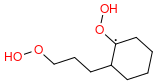

[O]OC1CCCCC1CCCOO <=> OOCCC[C]1CCCCC1OO
[O]OC1CCCCC1CCCOO <=> OOCCCC1CCC[CH]C1OO
[O]OC1CCCCC1CCCOO <=> OOCCCC1[CH]CCCC1OO
[O]OC1CCCCC1CCCOO <=> OOCC[CH]C1CCCCC1OO
[O]OC1CCCCC1CCCOO <=> OOCCCC1CC[CH]CC1OO
[O]OC1CCCCC1CCCOO <=> OOCCCC1C[CH]CCC1OO
[O]OC1CCCCC1CCCOO <=> OOC[CH]CC1CCCCC1OO
[O]OC1CCCCC1CCCOO <=> OO[CH]CCC1CCCCC1OO


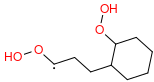

[O]OC1CCCC(CCCOO)C1 <=> OOCCCC1CCC[C](OO)C1


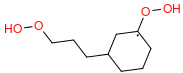

[O]OC1CCCC(CCCOO)C1 <=> OOCCCC1[CH]C(OO)CCC1
[O]OC1CCCC(CCCOO)C1 <=> OOCCCC1CC[CH]C(OO)C1
[O]OC1CCCC(CCCOO)C1 <=> OOCCC[C]1CCCC(OO)C1
[O]OC1CCCC(CCCOO)C1 <=> OOCCCC1C[CH]CC(OO)C1
[O]OC1CCCC(CCCOO)C1 <=> OOCCCC1[CH]CCC(OO)C1
[O]OC1CCCC(CCCOO)C1 <=> OOCC[CH]C1CCCC(OO)C1
[O]OC1CCCC(CCCOO)C1 <=> OOC[CH]CC1CCCC(OO)C1
[O]OC1CCCC(CCCOO)C1 <=> OO[CH]CCC1CCCC(OO)C1


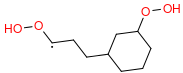

CC(CC1CCCCC1O[O])OO <=> CC(CC1CCCC[C]1OO)OO


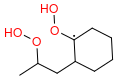

CC(CC1CCCCC1O[O])OO <=> CC(C[C]1CCCCC1OO)OO
CC(CC1CCCCC1O[O])OO <=> CC(CC1CCC[CH]C1OO)OO
CC(CC1CCCCC1O[O])OO <=> CC([CH]C1CCCCC1OO)OO
CC(CC1CCCCC1O[O])OO <=> CC(CC1[CH]CCCC1OO)OO
CC(CC1CCCCC1O[O])OO <=> CC(CC1CC[CH]CC1OO)OO
CC(CC1CCCCC1O[O])OO <=> C[C](CC1CCCCC1OO)OO


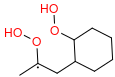

CC(CC1CCCCC1O[O])OO <=> CC(CC1C[CH]CCC1OO)OO
CC(CC1CCCCC1O[O])OO <=> [CH2]C(CC1CCCCC1OO)OO
CC(CC1CCCCC1O[O])OO <=> CC(CC1CCCCC1OO)O[O]
CC(CC1CCCC(O[O])C1)OO <=> CC(CC1CCC[C](OO)C1)OO


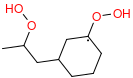

CC(CC1CCCC(O[O])C1)OO <=> CC(CC1[CH]C(OO)CCC1)OO
CC(CC1CCCC(O[O])C1)OO <=> CC(CC1CC[CH]C(OO)C1)OO
CC(CC1CCCC(O[O])C1)OO <=> CC(C[C]1CCCC(OO)C1)OO
CC(CC1CCCC(O[O])C1)OO <=> CC(CC1C[CH]CC(OO)C1)OO
CC(CC1CCCC(O[O])C1)OO <=> CC([CH]C1CCCC(OO)C1)OO
CC(CC1CCCC(O[O])C1)OO <=> CC(CC1[CH]CCC(OO)C1)OO
CC(CC1CCCC(O[O])C1)OO <=> C[C](CC1CCCC(OO)C1)OO


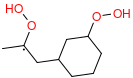

CC(CC1CCCC(O[O])C1)OO <=> [CH2]C(CC1CCCC(OO)C1)OO
CC(CC1CCC(O[O])CC1)OO <=> CC(CC1CC[C](OO)CC1)OO


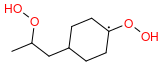

CC(CC1CCC(O[O])CC1)OO <=> CC(CC1C[CH]C(OO)CC1)OO
CC(CC1CCC(O[O])CC1)OO <=> CC(CC1[CH]CC(OO)CC1)OO
CC(CC1CCC(O[O])CC1)OO <=> CC(C[C]1CCC(OO)CC1)OO
CC(CC1CCC(O[O])CC1)OO <=> CC([CH]C1CCC(OO)CC1)OO
CC(CC1CCC(O[O])CC1)OO <=> C[C](CC1CCC(OO)CC1)OO


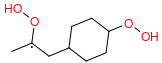

[O]OC(CCC1CCCCC1)OO <=> OO[C](CCC1CCCCC1)OO


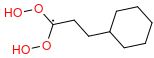

[O]OC(CCC1CCCCC1)OO <=> OOC([CH]CC1CCCCC1)OO
[O]OC(CCC1CCCCC1)OO <=> OOC(C[CH]C1CCCCC1)OO
[O]OC(CCC1CCCCC1)OO <=> OOC(CC[C]1CCCCC1)OO
[O]OC(CCC1CCCCC1)OO <=> OOC(CCC1[CH]CCCC1)OO
[O]OC(CCC1CCCCC1)OO <=> OOC(CCC1C[CH]CCC1)OO
[O]OC(COO)CC1CCCCC1 <=> OOC[C](CC1CCCCC1)OO


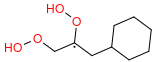

[O]OC(COO)CC1CCCCC1 <=> OOCC([CH]C1CCCCC1)OO
[O]OC(COO)CC1CCCCC1 <=> OO[CH]C(CC1CCCCC1)OO


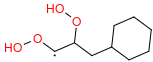

[O]OC(COO)CC1CCCCC1 <=> OOCC(C[C]1CCCCC1)OO
[O]OC(COO)CC1CCCCC1 <=> OOCC(CC1[CH]CCCC1)OO
[O]OC(COO)CC1CCCCC1 <=> [O]OCC(CC1CCCCC1)OO
[O]OC(COO)CC1CCCCC1 <=> OOCC(CC1C[CH]CCC1)OO
[O]OC(COO)CC1CCCCC1 <=> OOCC(CC1CC[CH]CC1)OO
[O]OC(CCOO)C1CCCCC1 <=> OOCC[C](OO)C1CCCCC1


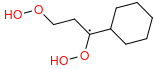

[O]OC(CCOO)C1CCCCC1 <=> OOCCC(OO)[C]1CCCCC1
[O]OC(CCOO)C1CCCCC1 <=> OOC[CH]C(OO)C1CCCCC1
[O]OC(CCOO)C1CCCCC1 <=> OOCCC(OO)C1[CH]CCCC1
[O]OC(CCOO)C1CCCCC1 <=> OO[CH]CC(OO)C1CCCCC1


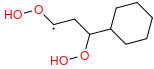

[O]OC(CCOO)C1CCCCC1 <=> OOCCC(OO)C1C[CH]CCC1
[O]OC(CCOO)C1CCCCC1 <=> OOCCC(OO)C1CC[CH]CC1
[O]OC(CCOO)C1CCCCC1 <=> [O]OCCC(OO)C1CCCCC1
[O]OC1(CCCOO)CCCCC1 <=> OOCCCC1(OO)[CH]CCCC1
[O]OC1(CCCOO)CCCCC1 <=> OOCC[CH]C1(OO)CCCCC1
[O]OC1(CCCOO)CCCCC1 <=> OOCCCC1(OO)C[CH]CCC1
[O]OC1(CCCOO)CCCCC1 <=> OOC[CH]CC1(OO)CCCCC1
[O]OC1(CCCOO)CCCCC1 <=> OOCCCC1(OO)CC[CH]CC1
[O]OC1(CCCOO)CCCCC1 <=> OO[CH]CCC1(OO)CCCCC1


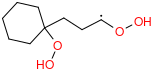

[O]OC1(CCCOO)CCCCC1 <=> [O]OCCCC1(OO)CCCCC1
[O]OCCCC1CCCCC1OO <=> OO[CH]CCC1CCCCC1OO


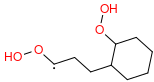

[O]OCCCC1CCCCC1OO <=> OOC[CH]CC1CCCCC1OO
[O]OCCCC1CCCCC1OO <=> OOCC[CH]C1CCCCC1OO
[O]OCCCC1CCCCC1OO <=> OOCCC[C]1CCCCC1OO
[O]OCCCC1CCCCC1OO <=> OOCCCC1CCCC[C]1OO


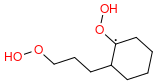

[O]OCCCC1CCCCC1OO <=> OOCCCC1[CH]CCCC1OO
[O]OCCCC1CCCCC1OO <=> OOCCCC1CCC[CH]C1OO
[O]OCCCC1CCCCC1OO <=> OOCCCC1C[CH]CCC1OO
CCCC1CCC(O[O])(OO)CC1 <=> CCCC1C[CH]C(OO)(OO)CC1
CCCC1CCC(O[O])(OO)CC1 <=> CCCC1[CH]CC(OO)(OO)CC1
CCCC1CCC(O[O])(OO)CC1 <=> CCC[C]1CCC(OO)(OO)CC1
CCCC1CCC(O[O])(OO)CC1 <=> CC[CH]C1CCC(OO)(OO)CC1
CCCC1CCC(O[O])(OO)CC1 <=> C[CH]CC1CCC(OO)(OO)CC1
CCCC1CCC(OO)C(O[O])C1 <=> CCCC1CCC(OO)[C](OO)C1


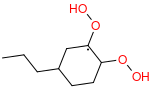

CCCC1CCC(OO)C(O[O])C1 <=> CCCC1CC[C](OO)C(OO)C1


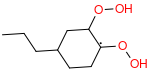

CCCC1CCC(OO)C(O[O])C1 <=> CCCC1[CH]C(OO)C(OO)CC1
CCCC1CCC(OO)C(O[O])C1 <=> CCCC1C[CH]C(OO)C(OO)C1
CCCC1CCC(OO)C(O[O])C1 <=> CCC[C]1CCC(OO)C(OO)C1
CCCC1CCC(OO)C(O[O])C1 <=> CCCC1CCC(O[O])C(OO)C1
CCCC1CCC(OO)C(O[O])C1 <=> CCCC1[CH]CC(OO)C(OO)C1
CCCC1CCC(OO)C(O[O])C1 <=> CC[CH]C1CCC(OO)C(OO)C1
CCCC1CCC(OO)C(O[O])C1 <=> C[CH]CC1CCC(OO)C(OO)C1
CCCC1CCC(OO)C(O[O])C1 <=> [CH2]CCC1CCC(OO)C(OO)C1
CCCC1CCC(OO)CC1O[O] <=> CCCC1CCC(OO)C[C]1OO


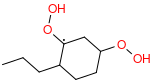

CCCC1CCC(OO)CC1O[O] <=> CCC[C]1CCC(OO)CC1OO
CCCC1CCC(OO)CC1O[O] <=> CCCC1CCC(OO)[CH]C1OO
CCCC1CCC(OO)CC1O[O] <=> CC[CH]C1CCC(OO)CC1OO
CCCC1CCC(OO)CC1O[O] <=> CCCC1[CH]CC(OO)CC1OO
CCCC1CCC(OO)CC1O[O] <=> CCCC1CC[C](OO)CC1OO


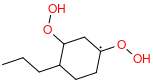

CCCC1CCC(OO)CC1O[O] <=> C[CH]CC1CCC(OO)CC1OO
CCCC1CCC(OO)CC1O[O] <=> CCCC1C[CH]C(OO)CC1OO
CCCC1CCC(OO)CC1O[O] <=> [CH2]CCC1CCC(OO)CC1OO
CCCC1CCC(OO)CC1O[O] <=> CCCC1CCC(O[O])CC1OO
CCCC1(O[O])CCC(OO)CC1 <=> CC[CH]C1(OO)CCC(OO)CC1
CCCC1(O[O])CCC(OO)CC1 <=> CCCC1(OO)[CH]CC(OO)CC1
CCCC1(O[O])CCC(OO)CC1 <=> C[CH]CC1(OO)CCC(OO)CC1
CCCC1(O[O])CCC(OO)CC1 <=> CCCC1(OO)C[CH]C(OO)CC1
CCCC1(O[O])CCC(OO)CC1 <=> [CH2]CCC1(OO)CCC(OO)CC1
CCCC1(O[O])CCC(OO)CC1 <=> CCCC1(OO)CC[C](OO)CC1


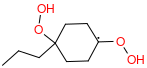

CCCC1(O[O])CCC(OO)CC1 <=> CCCC1(OO)CCC(O[O])CC1
CCC(O[O])C1CCC(OO)CC1 <=> CC[C](OO)C1CCC(OO)CC1


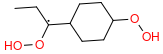

CCC(O[O])C1CCC(OO)CC1 <=> CCC(OO)[C]1CCC(OO)CC1
CCC(O[O])C1CCC(OO)CC1 <=> C[CH]C(OO)C1CCC(OO)CC1
CCC(O[O])C1CCC(OO)CC1 <=> CCC(OO)C1[CH]CC(OO)CC1
CCC(O[O])C1CCC(OO)CC1 <=> [CH2]CC(OO)C1CCC(OO)CC1
CCC(O[O])C1CCC(OO)CC1 <=> CCC(OO)C1C[CH]C(OO)CC1
CCC(O[O])C1CCC(OO)CC1 <=> CCC(OO)C1CC[C](OO)CC1


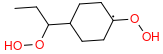

CC(CC1CCC(OO)CC1)O[O] <=> C[C](CC1CCC(OO)CC1)OO


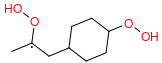

CC(CC1CCC(OO)CC1)O[O] <=> CC([CH]C1CCC(OO)CC1)OO
CC(CC1CCC(OO)CC1)O[O] <=> [CH2]C(CC1CCC(OO)CC1)OO
CC(CC1CCC(OO)CC1)O[O] <=> CC(C[C]1CCC(OO)CC1)OO
CC(CC1CCC(OO)CC1)O[O] <=> CC(CC1[CH]CC(OO)CC1)OO
CC(CC1CCC(OO)CC1)O[O] <=> CC(CC1C[CH]C(OO)CC1)OO
CC(CC1CCC(OO)CC1)O[O] <=> CC(CC1CC[C](OO)CC1)OO


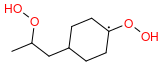

CCCC1CCCC(O[O])(OO)C1 <=> CCCC1[CH]C(OO)(OO)CCC1
CCCC1CCCC(O[O])(OO)C1 <=> CCCC1CC[CH]C(OO)(OO)C1
CCCC1CCCC(O[O])(OO)C1 <=> CCC[C]1CCCC(OO)(OO)C1
CCCC1CCCC(O[O])(OO)C1 <=> CCCC1C[CH]CC(OO)(OO)C1
CCCC1CCCC(O[O])(OO)C1 <=> CC[CH]C1CCCC(OO)(OO)C1
CCCC1CCCC(O[O])(OO)C1 <=> CCCC1[CH]CCC(OO)(OO)C1
CCCC1CCCC(O[O])(OO)C1 <=> C[CH]CC1CCCC(OO)(OO)C1
CCCC1CCCC(O[O])(OO)C1 <=> [CH2]CCC1CCCC(OO)(OO)C1
CCCC1CCCC(OO)C1O[O] <=> CCCC1CCCC(OO)[C]1OO


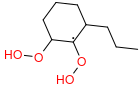

CCCC1CCCC(OO)C1O[O] <=> CCC[C]1CCCC(OO)C1OO
CCCC1CCCC(OO)C1O[O] <=> CCCC1CCC[C](OO)C1OO


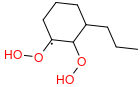

CCCC1CCCC(OO)C1O[O] <=> CC[CH]C1CCCC(OO)C1OO
CCCC1CCCC(OO)C1O[O] <=> CCCC1[CH]CCC(OO)C1OO
CCCC1CCCC(OO)C1O[O] <=> CCCC1CC[CH]C(OO)C1OO
CCCC1CCCC(OO)C1O[O] <=> C[CH]CC1CCCC(OO)C1OO
CCCC1CCCC(OO)C1O[O] <=> CCCC1C[CH]CC(OO)C1OO
CCCC1CCCC(OO)C1O[O] <=> CCCC1CCCC(O[O])C1OO
CCCC1CCCC(OO)C1O[O] <=> [CH2]CCC1CCCC(OO)C1OO
CCC(OO)C1CCCCC1O[O] <=> CCC(OO)C1CCCC[C]1OO


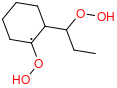

CCC(OO)C1CCCCC1O[O] <=> CCC(OO)[C]1CCCCC1OO
CCC(OO)C1CCCCC1O[O] <=> CCC(OO)C1CCC[CH]C1OO
CCC(OO)C1CCCCC1O[O] <=> CC[C](OO)C1CCCCC1OO


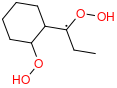

CCC(OO)C1CCCCC1O[O] <=> CCC(OO)C1[CH]CCCC1OO
CCC(OO)C1CCCCC1O[O] <=> CCC(OO)C1CC[CH]CC1OO
CCC(OO)C1CCCCC1O[O] <=> C[CH]C(OO)C1CCCCC1OO
CCC(OO)C1CCCCC1O[O] <=> CCC(OO)C1C[CH]CCC1OO
CCC(OO)C1CCCCC1O[O] <=> CCC(O[O])C1CCCCC1OO
CCC(OO)C1CCCCC1O[O] <=> [CH2]CC(OO)C1CCCCC1OO
CCC(O[O])(OO)C1CCCCC1 <=> CCC(OO)(OO)[C]1CCCCC1
CCC(O[O])(OO)C1CCCCC1 <=> C[CH]C(OO)(OO)C1CCCCC1
CCC(O[O])(OO)C1CCCCC1 <=> CCC(OO)(OO)C1[CH]CCCC1
CCC(O[O])(OO)C1CCCCC1 <=> [CH2]CC(OO)(OO)C1CCCCC1
CCC(O[O])(OO)C1CCCCC1 <=> CCC(OO)(OO)C1C[CH]CCC1
CCC(O[O])(OO)C1CCCCC1 <=> CCC(OO)(OO)C1CC[CH]CC1
CCC(OO)C1(O[O])CCCCC1 <=> CC[C](OO)C1(OO)CCCCC1


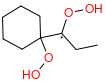

CCC(OO)C1(O[O])CCCCC1 <=> CCC(OO)C1(OO)[CH]CCCC1
CCC(OO)C1(O[O])CCCCC1 <=> C[CH]C(OO)C1(OO)CCCCC1
CCC(OO)C1(O[O])CCCCC1 <=> CCC(OO)C1(OO)C[CH]CCC1
CCC(OO)C1(O[O])CCCCC1 <=> CCC(O[O])C1(OO)CCCCC1
CCC(OO)C1(O[O])CCCCC1 <=> [CH2]CC(OO)C1(OO)CCCCC1
CCC(OO)C1(O[O])CCCCC1 <=> CCC(OO)C1(OO)CC[CH]CC1
CCC(O[O])C1(OO)CCCCC1 <=> CC[C](OO)C1(OO)CCCCC1


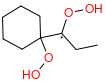

CCC(O[O])C1(OO)CCCCC1 <=> C[CH]C(OO)C1(OO)CCCCC1
CCC(O[O])C1(OO)CCCCC1 <=> CCC(OO)C1(OO)[CH]CCCC1
CCC(O[O])C1(OO)CCCCC1 <=> [CH2]CC(OO)C1(OO)CCCCC1
CCC(O[O])C1(OO)CCCCC1 <=> CCC(OO)C1(O[O])CCCCC1
CCC(O[O])C1(OO)CCCCC1 <=> CCC(OO)C1(OO)C[CH]CCC1
CCC(O[O])C1(OO)CCCCC1 <=> CCC(OO)C1(OO)CC[CH]CC1
CCCC1(OO)CCCC(O[O])C1 <=> CCCC1(OO)CCC[C](OO)C1


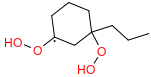

CCCC1(OO)CCCC(O[O])C1 <=> CCCC1(OO)[CH]C(OO)CCC1
CCCC1(OO)CCCC(O[O])C1 <=> CCCC1(OO)CC[CH]C(OO)C1
CCCC1(OO)CCCC(O[O])C1 <=> CCCC1(OO)C[CH]CC(OO)C1
CCCC1(OO)CCCC(O[O])C1 <=> CC[CH]C1(OO)CCCC(OO)C1
CCCC1(OO)CCCC(O[O])C1 <=> CCCC1(OO)[CH]CCC(OO)C1
CCCC1(OO)CCCC(O[O])C1 <=> CCCC1(O[O])CCCC(OO)C1
CCCC1(OO)CCCC(O[O])C1 <=> C[CH]CC1(OO)CCCC(OO)C1
CCCC1(OO)CCCC(O[O])C1 <=> [CH2]CCC1(OO)CCCC(OO)C1
[O]OCCCC1(OO)CCCCC1 <=> OO[CH]CCC1(OO)CCCCC1


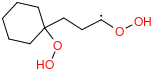

[O]OCCCC1(OO)CCCCC1 <=> OOC[CH]CC1(OO)CCCCC1
[O]OCCCC1(OO)CCCCC1 <=> OOCC[CH]C1(OO)CCCCC1
[O]OCCCC1(OO)CCCCC1 <=> OOCCCC1(OO)[CH]CCCC1
[O]OCCCC1(OO)CCCCC1 <=> [O]OC1(CCCOO)CCCCC1
[O]OCCCC1(OO)CCCCC1 <=> OOCCCC1(OO)C[CH]CCC1
[O]OCCC(OO)C1CCCCC1 <=> OO[CH]CC(OO)C1CCCCC1


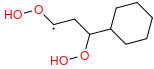

[O]OCCC(OO)C1CCCCC1 <=> OOC[CH]C(OO)C1CCCCC1
[O]OCCC(OO)C1CCCCC1 <=> OOCC[C](OO)C1CCCCC1


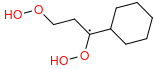

[O]OCCC(OO)C1CCCCC1 <=> OOCCC(OO)[C]1CCCCC1
[O]OCCC(OO)C1CCCCC1 <=> [O]OC(CCOO)C1CCCCC1
[O]OCCC(OO)C1CCCCC1 <=> OOCCC(OO)C1[CH]CCCC1
[O]OCCC(OO)C1CCCCC1 <=> OOCCC(OO)C1C[CH]CCC1
CCC(OO)C1CCC(O[O])CC1 <=> CCC(OO)C1CC[C](OO)CC1


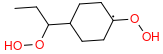

CCC(OO)C1CCC(O[O])CC1 <=> CCC(OO)C1C[CH]C(OO)CC1
CCC(OO)C1CCC(O[O])CC1 <=> CCC(OO)C1[CH]CC(OO)CC1
CCC(OO)C1CCC(O[O])CC1 <=> CCC(OO)[C]1CCC(OO)CC1
CCC(OO)C1CCC(O[O])CC1 <=> CC[C](OO)C1CCC(OO)CC1


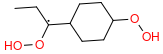

CCC(OO)C1CCC(O[O])CC1 <=> C[CH]C(OO)C1CCC(OO)CC1
CC(CC1CCCCC1OO)O[O] <=> C[C](CC1CCCCC1OO)OO


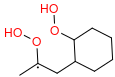

CC(CC1CCCCC1OO)O[O] <=> CC([CH]C1CCCCC1OO)OO
CC(CC1CCCCC1OO)O[O] <=> [CH2]C(CC1CCCCC1OO)OO
CC(CC1CCCCC1OO)O[O] <=> CC(C[C]1CCCCC1OO)OO
CC(CC1CCCCC1OO)O[O] <=> CC(CC1CCCC[C]1OO)OO


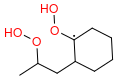

CC(CC1CCCCC1OO)O[O] <=> CC(CC1[CH]CCCC1OO)OO
CC(CC1CCCCC1OO)O[O] <=> CC(CC1CCC[CH]C1OO)OO
CC(CC1CCCCC1OO)O[O] <=> CC(CC1C[CH]CCC1OO)OO
CC(CC1CCCCC1OO)O[O] <=> CC(CC1CCCCC1O[O])OO
CC(CC1CCCCC1OO)O[O] <=> CC(CC1CC[CH]CC1OO)OO
CCCC1CC(O[O])CCC1OO <=> CCCC1C[C](OO)CCC1OO


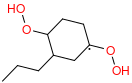

CCCC1CC(O[O])CCC1OO <=> CCCC1[CH]C(OO)CCC1OO
CCCC1CC(O[O])CCC1OO <=> CCCC1CC(OO)[CH]CC1OO
CCCC1CC(O[O])CCC1OO <=> CCC[C]1CC(OO)CCC1OO
CCCC1CC(O[O])CCC1OO <=> CCCC1CC(OO)C[CH]C1OO
CCCC1CC(O[O])CCC1OO <=> CCCC1CC(OO)CC[C]1OO


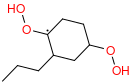

CCCC1CC(O[O])CCC1OO <=> CC[CH]C1CC(OO)CCC1OO
CCCC1CC(O[O])CCC1OO <=> C[CH]CC1CC(OO)CCC1OO
CCCC1CC(O[O])CCC1OO <=> CCCC1CC(OO)CCC1O[O]
CCCC1CC(O[O])CCC1OO <=> [CH2]CCC1CC(OO)CCC1OO
CCCC1(OO)CCCCC1O[O] <=> CCCC1(OO)CCCC[C]1OO


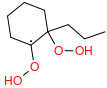

CCCC1(OO)CCCCC1O[O] <=> CCCC1(OO)CCC[CH]C1OO
CCCC1(OO)CCCCC1O[O] <=> CC[CH]C1(OO)CCCCC1OO
CCCC1(OO)CCCCC1O[O] <=> CCCC1(OO)[CH]CCCC1OO
CCCC1(OO)CCCCC1O[O] <=> CCCC1(OO)CC[CH]CC1OO
CCCC1(OO)CCCCC1O[O] <=> CCCC1(O[O])CCCCC1OO
CCCC1(OO)CCCCC1O[O] <=> C[CH]CC1(OO)CCCCC1OO
CCCC1(OO)CCCCC1O[O] <=> CCCC1(OO)C[CH]CCC1OO
CCCC1(OO)CCCCC1O[O] <=> [CH2]CCC1(OO)CCCCC1OO
CC(CC1(OO)CCCCC1)O[O] <=> C[C](CC1(OO)CCCCC1)OO


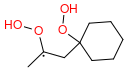

CC(CC1(OO)CCCCC1)O[O] <=> CC([CH]C1(OO)CCCCC1)OO
CC(CC1(OO)CCCCC1)O[O] <=> [CH2]C(CC1(OO)CCCCC1)OO
CC(CC1(OO)CCCCC1)O[O] <=> CC(CC1(OO)[CH]CCCC1)OO
CC(CC1(OO)CCCCC1)O[O] <=> CC(CC1(O[O])CCCCC1)OO
CC(CC1(OO)CCCCC1)O[O] <=> CC(CC1(OO)C[CH]CCC1)OO
CC(CC1(OO)CCCCC1)O[O] <=> CC(CC1(OO)CC[CH]CC1)OO
CC(O[O])C(OO)C1CCCCC1 <=> C[C](OO)C(OO)C1CCCCC1


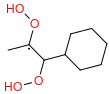

CC(O[O])C(OO)C1CCCCC1 <=> CC(OO)[C](OO)C1CCCCC1


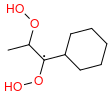

CC(O[O])C(OO)C1CCCCC1 <=> [CH2]C(OO)C(OO)C1CCCCC1
CC(O[O])C(OO)C1CCCCC1 <=> CC(OO)C(OO)[C]1CCCCC1
CC(O[O])C(OO)C1CCCCC1 <=> CC(OO)C(O[O])C1CCCCC1
CC(O[O])C(OO)C1CCCCC1 <=> CC(OO)C(OO)C1[CH]CCCC1
CC(O[O])C(OO)C1CCCCC1 <=> CC(OO)C(OO)C1C[CH]CCC1
CC(O[O])C(OO)C1CCCCC1 <=> CC(OO)C(OO)C1CC[CH]CC1
CCC(OO)C1CCCC(O[O])C1 <=> CCC(OO)C1CCC[C](OO)C1


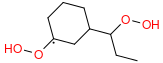

CCC(OO)C1CCCC(O[O])C1 <=> CCC(OO)C1[CH]C(OO)CCC1
CCC(OO)C1CCCC(O[O])C1 <=> CCC(OO)C1CC[CH]C(OO)C1
CCC(OO)C1CCCC(O[O])C1 <=> CCC(OO)[C]1CCCC(OO)C1
CCC(OO)C1CCCC(O[O])C1 <=> CCC(OO)C1C[CH]CC(OO)C1
CCC(OO)C1CCCC(O[O])C1 <=> CC[C](OO)C1CCCC(OO)C1


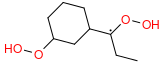

CCC(OO)C1CCCC(O[O])C1 <=> CCC(OO)C1[CH]CCC(OO)C1
CCC(OO)C1CCCC(O[O])C1 <=> C[CH]C(OO)C1CCCC(OO)C1
CCC(OO)C1CCCC(O[O])C1 <=> CCC(O[O])C1CCCC(OO)C1
CCC(OO)C1CCCC(O[O])C1 <=> [CH2]CC(OO)C1CCCC(OO)C1
CCCC1(O[O])CCCCC1OO <=> CCCC1(OO)CCCC[C]1OO


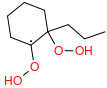

CCCC1(O[O])CCCCC1OO <=> CC[CH]C1(OO)CCCCC1OO
CCCC1(O[O])CCCCC1OO <=> CCCC1(OO)[CH]CCCC1OO
CCCC1(O[O])CCCCC1OO <=> CCCC1(OO)CCC[CH]C1OO
CCCC1(O[O])CCCCC1OO <=> C[CH]CC1(OO)CCCCC1OO
CCCC1(O[O])CCCCC1OO <=> CCCC1(OO)C[CH]CCC1OO
CCCC1(O[O])CCCCC1OO <=> CCCC1(OO)CCCCC1O[O]
CCCC1(O[O])CCCCC1OO <=> CCCC1(OO)CC[CH]CC1OO
CCCC1(O[O])CCCCC1OO <=> [CH2]CCC1(OO)CCCCC1OO
CCCC1CCCCC1(O[O])OO <=> CCC[C]1CCCCC1(OO)OO
CCCC1CCCCC1(O[O])OO <=> CCCC1CCC[CH]C1(OO)OO
CCCC1CCCCC1(O[O])OO <=> CC[CH]C1CCCCC1(OO)OO
CCCC1CCCCC1(O[O])OO <=> CCCC1[CH]CCCC1(OO)OO
CCCC1CCCCC1(O[O])OO <=> CCCC1CC[CH]CC1(OO)OO
CCCC1CCCCC1(O[O])OO <=> C[CH]CC1CCCCC1(OO)OO
CCCC1CCCCC1(O[O])OO <=> CCCC1C[CH]CCC1(OO)OO
CCCC1CCCCC1(O[O])OO <=> [CH2]CCC1CCCCC1(OO)OO
CCCC1(OO)CCC(O[O])CC1 <=> CCCC1(OO)CC[C](OO)CC1


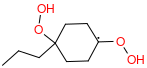

CCCC1(OO)CCC(O[O])CC1 <=> CCCC1(OO)C[CH]C(OO)CC1
CCCC1(OO)CCC(O[O])CC1 <=> CCCC1(OO)[CH]CC(OO)CC1
CCCC1(OO)CCC(O[O])CC1 <=> CC[CH]C1(OO)CCC(OO)CC1
CCCC1(OO)CCC(O[O])CC1 <=> CCCC1(O[O])CCC(OO)CC1
CCCC1(OO)CCC(O[O])CC1 <=> C[CH]CC1(OO)CCC(OO)CC1
CCCC1CCCC(O[O])C1OO <=> CCCC1CCC[C](OO)C1OO


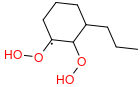

CCCC1CCCC(O[O])C1OO <=> CCCC1CCCC(OO)[C]1OO


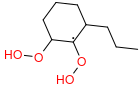

CCCC1CCCC(O[O])C1OO <=> CCCC1CC[CH]C(OO)C1OO
CCCC1CCCC(O[O])C1OO <=> CCC[C]1CCCC(OO)C1OO
CCCC1CCCC(O[O])C1OO <=> CCCC1C[CH]CC(OO)C1OO
CCCC1CCCC(O[O])C1OO <=> CCCC1CCCC(OO)C1O[O]
CCCC1CCCC(O[O])C1OO <=> CC[CH]C1CCCC(OO)C1OO
CCCC1CCCC(O[O])C1OO <=> CCCC1[CH]CCC(OO)C1OO
CCCC1CCCC(O[O])C1OO <=> C[CH]CC1CCCC(OO)C1OO
CCCC1CCCC(O[O])C1OO <=> [CH2]CCC1CCCC(OO)C1OO
CCC(O[O])C1CCCCC1OO <=> CC[C](OO)C1CCCCC1OO


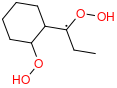

CCC(O[O])C1CCCCC1OO <=> CCC(OO)[C]1CCCCC1OO
CCC(O[O])C1CCCCC1OO <=> C[CH]C(OO)C1CCCCC1OO
CCC(O[O])C1CCCCC1OO <=> CCC(OO)C1CCCC[C]1OO


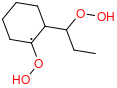

CCC(O[O])C1CCCCC1OO <=> CCC(OO)C1[CH]CCCC1OO
CCC(O[O])C1CCCCC1OO <=> [CH2]CC(OO)C1CCCCC1OO
CCC(O[O])C1CCCCC1OO <=> CCC(OO)C1CCC[CH]C1OO
CCC(O[O])C1CCCCC1OO <=> CCC(OO)C1C[CH]CCC1OO
CCC(O[O])C1CCCCC1OO <=> CCC(OO)C1CCCCC1O[O]
CCC(O[O])C1CCCCC1OO <=> CCC(OO)C1CC[CH]CC1OO
CCCC1C(O[O])CCCC1OO <=> CCCC1[C](OO)CCCC1OO


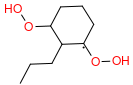

CCCC1C(O[O])CCCC1OO <=> CCC[C]1C(OO)CCCC1OO
CCCC1C(O[O])CCCC1OO <=> CCCC1C(OO)[CH]CCC1OO
CCCC1C(O[O])CCCC1OO <=> CCCC1[C](OO)CCCC1OO


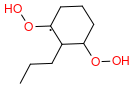

CCCC1C(O[O])CCCC1OO <=> CC[CH]C1C(OO)CCCC1OO
CCCC1C(O[O])CCCC1OO <=> CCCC1C(OO)C[CH]CC1OO
CCCC1C(O[O])CCCC1OO <=> CCCC1C(OO)[CH]CCC1OO
CCCC1C(O[O])CCCC1OO <=> C[CH]CC1C(OO)CCCC1OO
CCCC1C(O[O])CCCC1OO <=> [CH2]CCC1C(OO)CCCC1OO
CCCC1CCC(O[O])C(OO)C1 <=> CCCC1CC[C](OO)C(OO)C1


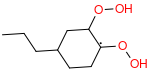

CCCC1CCC(O[O])C(OO)C1 <=> CCCC1CCC(OO)[C](OO)C1


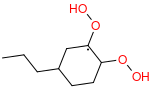

CCCC1CCC(O[O])C(OO)C1 <=> CCCC1C[CH]C(OO)C(OO)C1
CCCC1CCC(O[O])C(OO)C1 <=> CCCC1[CH]C(OO)C(OO)CC1
CCCC1CCC(O[O])C(OO)C1 <=> CCCC1[CH]CC(OO)C(OO)C1
CCCC1CCC(O[O])C(OO)C1 <=> CCCC1CCC(OO)C(O[O])C1
CCCC1CCC(O[O])C(OO)C1 <=> CCC[C]1CCC(OO)C(OO)C1
CCCC1CCC(O[O])C(OO)C1 <=> CC[CH]C1CCC(OO)C(OO)C1
CCCC1CCC(O[O])C(OO)C1 <=> C[CH]CC1CCC(OO)C(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> CCCC1(OO)[CH]C(OO)CCC1
CCCC1(O[O])CCCC(OO)C1 <=> CC[CH]C1(OO)CCCC(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> CCCC1(OO)[CH]CCC(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> CCCC1(OO)CCC[C](OO)C1


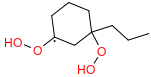

CCCC1(O[O])CCCC(OO)C1 <=> C[CH]CC1(OO)CCCC(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> CCCC1(OO)C[CH]CC(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> CCCC1(OO)CC[CH]C(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> [CH2]CCC1(OO)CCCC(OO)C1
CCCC1(O[O])CCCC(OO)C1 <=> CCCC1(OO)CCCC(O[O])C1
CCCC1CC(O[O])CC(OO)C1 <=> CCCC1C[C](OO)CC(OO)C1


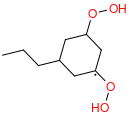

CCCC1CC(O[O])CC(OO)C1 <=> CCCC1[CH]C(OO)CC(OO)C1
CCCC1CC(O[O])CC(OO)C1 <=> CCCC1CC(OO)[CH]C(OO)C1
CCCC1CC(O[O])CC(OO)C1 <=> CCC[C]1CC(OO)CC(OO)C1
CCCC1CC(O[O])CC(OO)C1 <=> CCCC1C[C](OO)CC(OO)C1


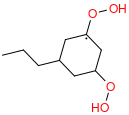

CCCC1CC(O[O])CC(OO)C1 <=> CCCC1[CH]C(OO)CC(OO)C1
CCCC1CC(O[O])CC(OO)C1 <=> CC[CH]C1CC(OO)CC(OO)C1
CCCC1CC(O[O])CC(OO)C1 <=> C[CH]CC1CC(OO)CC(OO)C1
CCCC1CC(O[O])CC(OO)C1 <=> [CH2]CCC1CC(OO)CC(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> CC[C](OO)C1CCCC(OO)C1


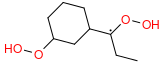

CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)[C]1CCCC(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> C[CH]C(OO)C1CCCC(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)C1[CH]C(OO)CCC1
CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)C1[CH]CCC(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> [CH2]CC(OO)C1CCCC(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)C1CCC[C](OO)C1


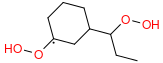

CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)C1C[CH]CC(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)C1CC[CH]C(OO)C1
CCC(O[O])C1CCCC(OO)C1 <=> CCC(OO)C1CCCC(O[O])C1
CCCC1CC(OO)CCC1O[O] <=> CCCC1CC(OO)CC[C]1OO


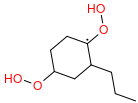

CCCC1CC(OO)CCC1O[O] <=> CCC[C]1CC(OO)CCC1OO
CCCC1CC(OO)CCC1O[O] <=> CCCC1CC(OO)C[CH]C1OO
CCCC1CC(OO)CCC1O[O] <=> CCCC1[CH]C(OO)CCC1OO
CCCC1CC(OO)CCC1O[O] <=> CC[CH]C1CC(OO)CCC1OO
CCCC1CC(OO)CCC1O[O] <=> CCCC1CC(OO)[CH]CC1OO
CCCC1CC(OO)CCC1O[O] <=> CCCC1C[C](OO)CCC1OO


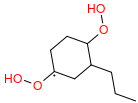

CCCC1CC(OO)CCC1O[O] <=> C[CH]CC1CC(OO)CCC1OO
CCCC1CC(OO)CCC1O[O] <=> [CH2]CCC1CC(OO)CCC1OO
CCCC1CC(OO)CCC1O[O] <=> CCCC1CC(O[O])CCC1OO
CC(CC1CCCC(OO)C1)O[O] <=> C[C](CC1CCCC(OO)C1)OO


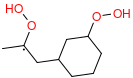

CC(CC1CCCC(OO)C1)O[O] <=> CC([CH]C1CCCC(OO)C1)OO
CC(CC1CCCC(OO)C1)O[O] <=> [CH2]C(CC1CCCC(OO)C1)OO
CC(CC1CCCC(OO)C1)O[O] <=> CC(C[C]1CCCC(OO)C1)OO
CC(CC1CCCC(OO)C1)O[O] <=> CC(CC1[CH]C(OO)CCC1)OO
CC(CC1CCCC(OO)C1)O[O] <=> CC(CC1[CH]CCC(OO)C1)OO
CC(CC1CCCC(OO)C1)O[O] <=> CC(CC1CCC[C](OO)C1)OO


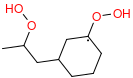

CC(CC1CCCC(OO)C1)O[O] <=> CC(CC1C[CH]CC(OO)C1)OO
CC(CC1CCCC(OO)C1)O[O] <=> CC(CC1CC[CH]C(OO)C1)OO
[O]OCCCC1CCCC(OO)C1 <=> OO[CH]CCC1CCCC(OO)C1


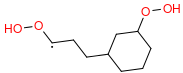

[O]OCCCC1CCCC(OO)C1 <=> OOC[CH]CC1CCCC(OO)C1
[O]OCCCC1CCCC(OO)C1 <=> OOCC[CH]C1CCCC(OO)C1
[O]OCCCC1CCCC(OO)C1 <=> OOCCC[C]1CCCC(OO)C1
[O]OCCCC1CCCC(OO)C1 <=> OOCCCC1[CH]C(OO)CCC1
[O]OCCCC1CCCC(OO)C1 <=> OOCCCC1[CH]CCC(OO)C1
[O]OCCCC1CCCC(OO)C1 <=> OOCCCC1CCC[C](OO)C1


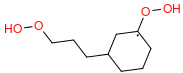

[O]OCCCC1CCCC(OO)C1 <=> OOCCCC1C[CH]CC(OO)C1
CC(CC1CCCCC1)(O[O])OO <=> CC([CH]C1CCCCC1)(OO)OO
CC(CC1CCCCC1)(O[O])OO <=> [CH2]C(CC1CCCCC1)(OO)OO
CC(CC1CCCCC1)(O[O])OO <=> CC(C[C]1CCCCC1)(OO)OO
CC(CC1CCCCC1)(O[O])OO <=> CC(CC1[CH]CCCC1)(OO)OO
CC(CC1CCCCC1)(O[O])OO <=> CC(CC1C[CH]CCC1)(OO)OO
CC(CC1CCCCC1)(O[O])OO <=> CC(CC1CC[CH]CC1)(OO)OO
CC(OO)C(O[O])C1CCCCC1 <=> CC(OO)[C](OO)C1CCCCC1


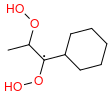

CC(OO)C(O[O])C1CCCCC1 <=> CC(OO)C(OO)[C]1CCCCC1
CC(OO)C(O[O])C1CCCCC1 <=> C[C](OO)C(OO)C1CCCCC1


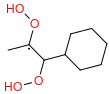

CC(OO)C(O[O])C1CCCCC1 <=> CC(OO)C(OO)C1[CH]CCCC1
CC(OO)C(O[O])C1CCCCC1 <=> [CH2]C(OO)C(OO)C1CCCCC1
CC(OO)C(O[O])C1CCCCC1 <=> CC(OO)C(OO)C1C[CH]CCC1
CC(OO)C(O[O])C1CCCCC1 <=> CC(O[O])C(OO)C1CCCCC1
CC(OO)C(O[O])C1CCCCC1 <=> CC(OO)C(OO)C1CC[CH]CC1
[O]OCC(CC1CCCCC1)OO <=> OO[CH]C(CC1CCCCC1)OO


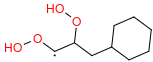

[O]OCC(CC1CCCCC1)OO <=> OOC[C](CC1CCCCC1)OO


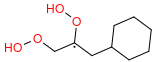

[O]OCC(CC1CCCCC1)OO <=> OOCC([CH]C1CCCCC1)OO
[O]OCC(CC1CCCCC1)OO <=> [O]OC(COO)CC1CCCCC1
[O]OCC(CC1CCCCC1)OO <=> OOCC(C[C]1CCCCC1)OO
[O]OCC(CC1CCCCC1)OO <=> OOCC(CC1[CH]CCCC1)OO
[O]OCC(CC1CCCCC1)OO <=> OOCC(CC1C[CH]CCC1)OO
CCCC1CCC(O[O])CC1OO <=> CCCC1CC[C](OO)CC1OO


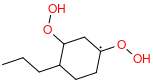

CCCC1CCC(O[O])CC1OO <=> CCCC1CCC(OO)[CH]C1OO
CCCC1CCC(O[O])CC1OO <=> CCCC1C[CH]C(OO)CC1OO
CCCC1CCC(O[O])CC1OO <=> CCCC1CCC(OO)C[C]1OO


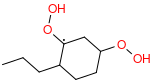

CCCC1CCC(O[O])CC1OO <=> CCCC1[CH]CC(OO)CC1OO
CCCC1CCC(O[O])CC1OO <=> CCC[C]1CCC(OO)CC1OO
CCCC1CCC(O[O])CC1OO <=> CCCC1CCC(OO)CC1O[O]
CCCC1CCC(O[O])CC1OO <=> CC[CH]C1CCC(OO)CC1OO
CCCC1CCC(O[O])CC1OO <=> C[CH]CC1CCC(OO)CC1OO
CC(CC1(O[O])CCCCC1)OO <=> CC([CH]C1(OO)CCCCC1)OO
CC(CC1(O[O])CCCCC1)OO <=> CC(CC1(OO)[CH]CCCC1)OO
CC(CC1(O[O])CCCCC1)OO <=> C[C](CC1(OO)CCCCC1)OO


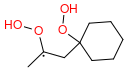

CC(CC1(O[O])CCCCC1)OO <=> CC(CC1(OO)C[CH]CCC1)OO
CC(CC1(O[O])CCCCC1)OO <=> [CH2]C(CC1(OO)CCCCC1)OO
CC(CC1(O[O])CCCCC1)OO <=> CC(CC1(OO)CC[CH]CC1)OO
CC(CC1(O[O])CCCCC1)OO <=> CC(CC1(OO)CCCCC1)O[O]
HOOQjOOH


{Molecule(smiles="CC[C](OO)C1CCC(OO)CC1"),
 Molecule(smiles="CCC(OO)C1CC[C](OO)CC1"),
 Molecule(smiles="CCCC1CCCC(OO)[C]1OO"),
 Molecule(smiles="CCCC1CCC[C](OO)C1OO"),
 Molecule(smiles="CCC(OO)C1CCCC[C]1OO"),
 Molecule(smiles="CC[C](OO)C1CCCCC1OO"),
 Molecule(smiles="CC[C](OO)C1(OO)CCCCC1"),
 Molecule(smiles="CCCC1(OO)CCC[C](OO)C1"),
 Molecule(smiles="CCCC1C[C](OO)CCC1OO"),
 Molecule(smiles="C[C](CC1CCC(OO)CC1)OO"),
 Molecule(smiles="OO[C](CCC1CCCCC1)OO"),
 Molecule(smiles="OOC[C](CC1CCCCC1)OO"),
 Molecule(smiles="CCCC1CCC(OO)[C](OO)C1"),
 Molecule(smiles="OOCCCC1CCCC[C]1OO"),
 Molecule(smiles="OO[CH]CCC1CCCCC1OO"),
 Molecule(smiles="OO[CH]C(CC1CCCCC1)OO"),
 Molecule(smiles="OO[CH]CCC1(OO)CCCCC1"),
 Molecule(smiles="CCCC1CC[C](OO)CC1OO"),
 Molecule(smiles="CCCC1(OO)CC[C](OO)CC1"),
 Molecule(smiles="CCCC1CC[C](OO)C(OO)C1"),
 Molecule(smiles="CCCC1CCC(OO)C[C]1OO"),
 Molecule(smiles="OOCC[C](OO)C1CCCCC1"),
 Molecule(smiles="OO[CH]CC(OO)C1CCCCC1"),
 Molecule(smiles="CC(CC1CCCC[C]1OO)OO"),


In [20]:
# O2QOOH on its way towards OH + keto-hydroperoxide
print("Applying intra_H_migration but finding just the HOOQjOOH radicals")
for s in molecules['O2QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='intra_H_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        if m.is_subgraph_isomorphic(rjooh):
            display(m)
            molecules['HOOQjOOH'].add(m)
print('HOOQjOOH')
molecules['HOOQjOOH']

Applying R_Addition_MultipleBond to HOOQjOOH to find its Beta Scission products
CCC(OO)=C1CCC(OO)CC1 + [H] <=> CC[C](OO)C1CCC(OO)CC1
CC=C(OO)C1CCC(OO)CC1 + [H] <=> CC[C](OO)C1CCC(OO)CC1
C=C(OO)C1CCC(OO)CC1 + [CH3] <=> CC[C](OO)C1CCC(OO)CC1
CCC(=O)C1CCC(OO)CC1 + [OH] <=> CC[C](OO)C1CCC(OO)CC1


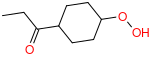

CCC(OO)C1CC=C(OO)CC1 + [H] <=> CCC(OO)C1CC[C](OO)CC1
CCC(OO)C1CCC(=O)CC1 + [OH] <=> CCC(OO)C1CC[C](OO)CC1


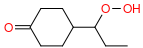

CCCC1=C(OO)C(OO)CCC1 + [H] <=> CCCC1CCCC(OO)[C]1OO
CCCC1CCCC(OO)=C1OO + [H] <=> CCCC1CCCC(OO)[C]1OO
OOC1=CCCCC1OO + [CH2]CC <=> CCCC1CCCC(OO)[C]1OO
CCCC1CCCC(OO)C1=O + [OH] <=> CCCC1CCCC(OO)[C]1OO


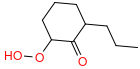

CCCC1CCCC=C1OO + [O]O <=> CCCC1CCCC(OO)[C]1OO
CCCC1CCCC(OO)=C1OO + [H] <=> CCCC1CCC[C](OO)C1OO
CCCC1CCC=C(OO)C1OO + [H] <=> CCCC1CCC[C](OO)C1OO
CCCC1CCCC(=O)C1OO + [OH] <=> CCCC1CCC[C](OO)C1OO


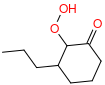

CCCC1C=C(OO)CCC1 + [O]O <=> CCCC1CCC[C](OO)C1OO
CCC(OO)C1=C(OO)CCCC1 + [H] <=> CCC(OO)C1CCCC[C]1OO
CCC(OO)C1CCCC=C1OO + [H] <=> CCC(OO)C1CCCC[C]1OO
OOC1=CCCCC1 + CC[CH]OO <=> CCC(OO)C1CCCC[C]1OO
CCC(OO)C1CCCCC1=O + [OH] <=> CCC(OO)C1CCCC[C]1OO


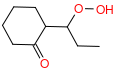

CCC(OO)=C1CCCCC1OO + [H] <=> CC[C](OO)C1CCCCC1OO
CC=C(OO)C1CCCCC1OO + [H] <=> CC[C](OO)C1CCCCC1OO
C=C(OO)C1CCCCC1OO + [CH3] <=> CC[C](OO)C1CCCCC1OO
CCC(=O)C1CCCCC1OO + [OH] <=> CC[C](OO)C1CCCCC1OO


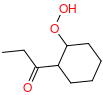

CC=C(OO)C1(OO)CCCCC1 + [H] <=> CC[C](OO)C1(OO)CCCCC1
C=C(OO)C1(OO)CCCCC1 + [CH3] <=> CC[C](OO)C1(OO)CCCCC1
CCC(=O)C1(OO)CCCCC1 + [OH] <=> CC[C](OO)C1(OO)CCCCC1


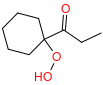

CCC(OO)=C1CCCCC1 + [O]O <=> CC[C](OO)C1(OO)CCCCC1
CCCC1(OO)C=C(OO)CCC1 + [H] <=> CCCC1(OO)CCC[C](OO)C1
CCCC1(OO)CCC=C(OO)C1 + [H] <=> CCCC1(OO)CCC[C](OO)C1
CCCC1(OO)CCCC(=O)C1 + [OH] <=> CCCC1(OO)CCC[C](OO)C1


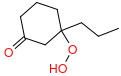

CCCC1C=C(OO)CCC1OO + [H] <=> CCCC1C[C](OO)CCC1OO
CCCC1CC(OO)=CCC1OO + [H] <=> CCCC1C[C](OO)CCC1OO
CCCC1CC(=O)CCC1OO + [OH] <=> CCCC1C[C](OO)CCC1OO


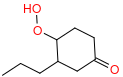

CC(=CC1CCC(OO)CC1)OO + [H] <=> C[C](CC1CCC(OO)CC1)OO
C=C(CC1CCC(OO)CC1)OO + [H] <=> C[C](CC1CCC(OO)CC1)OO
C=C(C)OO + OOC1CC[CH]CC1 <=> C[C](CC1CCC(OO)CC1)OO
CC(=O)CC1CCC(OO)CC1 + [OH] <=> C[C](CC1CCC(OO)CC1)OO


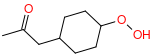

OOC(=CCC1CCCCC1)OO + [H] <=> OO[C](CCC1CCCCC1)OO
C=C(OO)OO + [CH2]C1CCCCC1 <=> OO[C](CCC1CCCCC1)OO
O=C(CCC1CCCCC1)OO + [OH] <=> OO[C](CCC1CCCCC1)OO


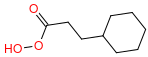

OOCC(=CC1CCCCC1)OO + [H] <=> OOC[C](CC1CCCCC1)OO
OOC=C(CC1CCCCC1)OO + [H] <=> OOC[C](CC1CCCCC1)OO
C=C(COO)OO + [CH]1CCCCC1 <=> OOC[C](CC1CCCCC1)OO
O=C(COO)CC1CCCCC1 + [OH] <=> OOC[C](CC1CCCCC1)OO


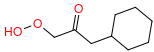

C=C(CC1CCCCC1)OO + [O]O <=> OOC[C](CC1CCCCC1)OO
CCCC1CCC(OO)=C(OO)C1 + [H] <=> CCCC1CCC(OO)[C](OO)C1
CCCC1C=C(OO)C(OO)CC1 + [H] <=> CCCC1CCC(OO)[C](OO)C1
CCCC1CCC(OO)C(=O)C1 + [OH] <=> CCCC1CCC(OO)[C](OO)C1


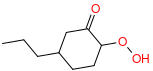

CCCC1CCC=C(OO)C1 + [O]O <=> CCCC1CCC(OO)[C](OO)C1
OOCCCC1=C(OO)CCCC1 + [H] <=> OOCCCC1CCCC[C]1OO
OOCCCC1CCCC=C1OO + [H] <=> OOCCCC1CCCC[C]1OO
OOC1=CCCCC1 + [CH2]CCOO <=> OOCCCC1CCCC[C]1OO
O=C1CCCCC1CCCOO + [OH] <=> OOCCCC1CCCC[C]1OO


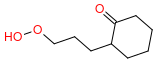

OOC=CCC1CCCCC1OO + [H] <=> OO[CH]CCC1CCCCC1OO
C=COO + [CH2]C1CCCCC1OO <=> OO[CH]CCC1CCCCC1OO
O=CCCC1CCCCC1OO + [OH] <=> OO[CH]CCC1CCCCC1OO


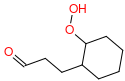

OOC=C(CC1CCCCC1)OO + [H] <=> OO[CH]C(CC1CCCCC1)OO
OOC=COO + [CH2]C1CCCCC1 <=> OO[CH]C(CC1CCCCC1)OO
O=CC(CC1CCCCC1)OO + [OH] <=> OO[CH]C(CC1CCCCC1)OO


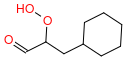

OOC=CCC1CCCCC1 + [O]O <=> OO[CH]C(CC1CCCCC1)OO
OOC=CCC1(OO)CCCCC1 + [H] <=> OO[CH]CCC1(OO)CCCCC1
C=COO + [CH2]C1(OO)CCCCC1 <=> OO[CH]CCC1(OO)CCCCC1
O=CCCC1(OO)CCCCC1 + [OH] <=> OO[CH]CCC1(OO)CCCCC1


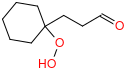

CCCC1CCC(OO)=CC1OO + [H] <=> CCCC1CC[C](OO)CC1OO
CCCC1CC=C(OO)CC1OO + [H] <=> CCCC1CC[C](OO)CC1OO
CCCC1CCC(=O)CC1OO + [OH] <=> CCCC1CC[C](OO)CC1OO


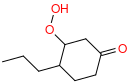

CCCC1(OO)CC=C(OO)CC1 + [H] <=> CCCC1(OO)CC[C](OO)CC1
CCCC1(OO)CCC(=O)CC1 + [OH] <=> CCCC1(OO)CC[C](OO)CC1


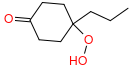

CCCC1CCC(OO)=C(OO)C1 + [H] <=> CCCC1CC[C](OO)C(OO)C1
CCCC1CC=C(OO)C(OO)C1 + [H] <=> CCCC1CC[C](OO)C(OO)C1
CCCC1CCC(=O)C(OO)C1 + [OH] <=> CCCC1CC[C](OO)C(OO)C1


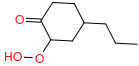

CCCC1CC=C(OO)CC1 + [O]O <=> CCCC1CC[C](OO)C(OO)C1
CCCC1=C(OO)CC(OO)CC1 + [H] <=> CCCC1CCC(OO)C[C]1OO
CCCC1CCC(OO)C=C1OO + [H] <=> CCCC1CCC(OO)C[C]1OO
OOC1=CCCC(OO)C1 + [CH2]CC <=> CCCC1CCC(OO)C[C]1OO
CCCC1CCC(OO)CC1=O + [OH] <=> CCCC1CCC(OO)C[C]1OO


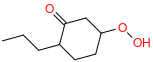

OOCCC(OO)=C1CCCCC1 + [H] <=> OOCC[C](OO)C1CCCCC1
OOCC=C(OO)C1CCCCC1 + [H] <=> OOCC[C](OO)C1CCCCC1
C=C(OO)C1CCCCC1 + [CH2]OO <=> OOCC[C](OO)C1CCCCC1
O=C(CCOO)C1CCCCC1 + [OH] <=> OOCC[C](OO)C1CCCCC1


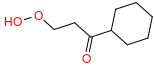

OOC=CC(OO)C1CCCCC1 + [H] <=> OO[CH]CC(OO)C1CCCCC1
C=COO + OO[CH]C1CCCCC1 <=> OO[CH]CC(OO)C1CCCCC1
O=CCC(OO)C1CCCCC1 + [OH] <=> OO[CH]CC(OO)C1CCCCC1


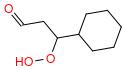

CC(CC1=C(OO)CCCC1)OO + [H] <=> CC(CC1CCCC[C]1OO)OO
CC(CC1CCCC=C1OO)OO + [H] <=> CC(CC1CCCC[C]1OO)OO
OOC1=CCCCC1 + [CH2]C(C)OO <=> CC(CC1CCCC[C]1OO)OO
CC(CC1CCCCC1=O)OO + [OH] <=> CC(CC1CCCC[C]1OO)OO


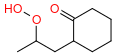

OOC=CCC1CCCC(OO)C1 + [H] <=> OO[CH]CCC1CCCC(OO)C1
C=COO + [CH2]C1CCCC(OO)C1 <=> OO[CH]CCC1CCCC(OO)C1
O=CCCC1CCCC(OO)C1 + [OH] <=> OO[CH]CCC1CCCC(OO)C1


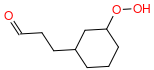

OOCCCC1C=C(OO)CCC1 + [H] <=> OOCCCC1CCC[C](OO)C1
OOCCCC1CCC=C(OO)C1 + [H] <=> OOCCCC1CCC[C](OO)C1
O=C1CCCC(CCCOO)C1 + [OH] <=> OOCCCC1CCC[C](OO)C1


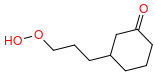

CC(=CC1CCCCC1OO)OO + [H] <=> C[C](CC1CCCCC1OO)OO
C=C(CC1CCCCC1OO)OO + [H] <=> C[C](CC1CCCCC1OO)OO
C=C(C)OO + OOC1[CH]CCCC1 <=> C[C](CC1CCCCC1OO)OO
CC(=O)CC1CCCCC1OO + [OH] <=> C[C](CC1CCCCC1OO)OO


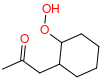

CC(CC1C=C(OO)CCC1)OO + [H] <=> CC(CC1CCC[C](OO)C1)OO
CC(CC1CCC=C(OO)C1)OO + [H] <=> CC(CC1CCC[C](OO)C1)OO
CC(CC1CCCC(=O)C1)OO + [OH] <=> CC(CC1CCC[C](OO)C1)OO


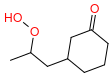

CC(=CC1CCCC(OO)C1)OO + [H] <=> C[C](CC1CCCC(OO)C1)OO
C=C(CC1CCCC(OO)C1)OO + [H] <=> C[C](CC1CCCC(OO)C1)OO
C=C(C)OO + OOC1C[CH]CCC1 <=> C[C](CC1CCCC(OO)C1)OO
CC(=O)CC1CCCC(OO)C1 + [OH] <=> C[C](CC1CCCC(OO)C1)OO


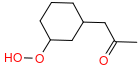

CCCC1=C(OO)CCC(OO)C1 + [H] <=> CCCC1CC(OO)CC[C]1OO
CCCC1CC(OO)CC=C1OO + [H] <=> CCCC1CC(OO)CC[C]1OO
OOC1=CCC(OO)CC1 + [CH2]CC <=> CCCC1CC(OO)CC[C]1OO
CCCC1CC(OO)CCC1=O + [OH] <=> CCCC1CC(OO)CC[C]1OO


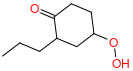

CCCC1(OO)CCCC=C1OO + [H] <=> CCCC1(OO)CCCC[C]1OO
OOC1=C(OO)CCCC1 + [CH2]CC <=> CCCC1(OO)CCCC[C]1OO
CCCC1(OO)CCCCC1=O + [OH] <=> CCCC1(OO)CCCC[C]1OO


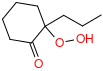

CCCC1=C(OO)CCCC1 + [O]O <=> CCCC1(OO)CCCC[C]1OO
CC(=CC1(OO)CCCCC1)OO + [H] <=> C[C](CC1(OO)CCCCC1)OO
C=C(CC1(OO)CCCCC1)OO + [H] <=> C[C](CC1(OO)CCCCC1)OO
C=C(C)OO + OO[C]1CCCCC1 <=> C[C](CC1(OO)CCCCC1)OO
CC(=O)CC1(OO)CCCCC1 + [OH] <=> C[C](CC1(OO)CCCCC1)OO


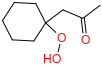

CC(OO)=C(OO)C1CCCCC1 + [H] <=> C[C](OO)C(OO)C1CCCCC1
C=C(OO)C(OO)C1CCCCC1 + [H] <=> C[C](OO)C(OO)C1CCCCC1
CC(=COO)OO + [CH]1CCCCC1 <=> C[C](OO)C(OO)C1CCCCC1
CC(=O)C(OO)C1CCCCC1 + [OH] <=> C[C](OO)C(OO)C1CCCCC1


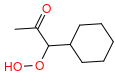

CC(=CC1CCCCC1)OO + [O]O <=> C[C](OO)C(OO)C1CCCCC1
CC(OO)C(OO)=C1CCCCC1 + [H] <=> CC(OO)[C](OO)C1CCCCC1
CC(OO)=C(OO)C1CCCCC1 + [H] <=> CC(OO)[C](OO)C1CCCCC1
OOC=C(OO)C1CCCCC1 + [CH3] <=> CC(OO)[C](OO)C1CCCCC1
CC(OO)C(=O)C1CCCCC1 + [OH] <=> CC(OO)[C](OO)C1CCCCC1


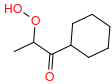

CC=C(OO)C1CCCCC1 + [O]O <=> CC(OO)[C](OO)C1CCCCC1
CCC(OO)C1C=C(OO)CCC1 + [H] <=> CCC(OO)C1CCC[C](OO)C1
CCC(OO)C1CCC=C(OO)C1 + [H] <=> CCC(OO)C1CCC[C](OO)C1
CCC(OO)C1CCCC(=O)C1 + [OH] <=> CCC(OO)C1CCC[C](OO)C1


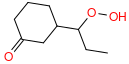

CCC(OO)=C1CCCC(OO)C1 + [H] <=> CC[C](OO)C1CCCC(OO)C1
CC=C(OO)C1CCCC(OO)C1 + [H] <=> CC[C](OO)C1CCCC(OO)C1
C=C(OO)C1CCCC(OO)C1 + [CH3] <=> CC[C](OO)C1CCCC(OO)C1
CCC(=O)C1CCCC(OO)C1 + [OH] <=> CC[C](OO)C1CCCC(OO)C1


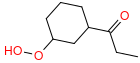

CCCC1=C(OO)CCCC1OO + [H] <=> CCCC1[C](OO)CCCC1OO
CCCC1C(OO)=CCCC1OO + [H] <=> CCCC1[C](OO)CCCC1OO
OOC1=CC(OO)CCC1 + [CH2]CC <=> CCCC1[C](OO)CCCC1OO
CCCC1C(=O)CCCC1OO + [OH] <=> CCCC1[C](OO)CCCC1OO


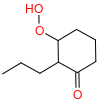

CCCC1C=C(OO)CC(OO)C1 + [H] <=> CCCC1C[C](OO)CC(OO)C1
CCCC1CC(OO)=CC(OO)C1 + [H] <=> CCCC1C[C](OO)CC(OO)C1
CCCC1CC(=O)CC(OO)C1 + [OH] <=> CCCC1C[C](OO)CC(OO)C1


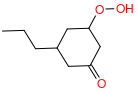

CC(CC1CC=C(OO)CC1)OO + [H] <=> CC(CC1CC[C](OO)CC1)OO
CC(CC1CCC(=O)CC1)OO + [OH] <=> CC(CC1CC[C](OO)CC1)OO


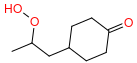

ketohydroperoxide


{Molecule(smiles="CCCC1(OO)CCCCC1=O"),
 Molecule(smiles="CC(=O)CC1(OO)CCCCC1"),
 Molecule(smiles="CC(=O)C(OO)C1CCCCC1"),
 Molecule(smiles="CC(OO)C(=O)C1CCCCC1"),
 Molecule(smiles="CCC(OO)C1CCCC(=O)C1"),
 Molecule(smiles="CCC(=O)C1CCCC(OO)C1"),
 Molecule(smiles="CCCC1C(=O)CCCC1OO"),
 Molecule(smiles="CCCC1CC(=O)CC(OO)C1"),
 Molecule(smiles="CC(CC1CCC(=O)CC1)OO"),
 Molecule(smiles="CCCC1CCC(OO)CC1=O"),
 Molecule(smiles="O=C(CCOO)C1CCCCC1"),
 Molecule(smiles="O=CCC(OO)C1CCCCC1"),
 Molecule(smiles="CC(CC1CCCCC1=O)OO"),
 Molecule(smiles="O=CCCC1CCCC(OO)C1"),
 Molecule(smiles="O=C1CCCC(CCCOO)C1"),
 Molecule(smiles="CC(=O)CC1CCCCC1OO"),
 Molecule(smiles="CC(CC1CCCC(=O)C1)OO"),
 Molecule(smiles="CC(=O)CC1CCCC(OO)C1"),
 Molecule(smiles="CCCC1CC(OO)CCC1=O"),
 Molecule(smiles="CCCC1CCCC(=O)C1OO"),
 Molecule(smiles="CCC(OO)C1CCC(=O)CC1"),
 Molecule(smiles="CCCC1CCCC(OO)C1=O"),
 Molecule(smiles="CCC(=O)C1CCC(OO)CC1"),
 Molecule(smiles="CCC(OO)C1CCCCC1=O"),
 Molecule(smiles="CCC(=O)C1CCCCC1OO"),
 Mo

In [21]:
# HOOQjOOH now beta scissions to OH + ketohydroperoxide
print("Applying R_Addition_MultipleBond to HOOQjOOH to find its Beta Scission products")
for s in molecules['HOOQjOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='R_Addition_MultipleBond')
    for r in reactions:
        print(r)
        r1 = r.reactants[0].molecule[0]
        r2 = r.reactants[1].molecule[0]
        if r2.get_formula() == 'HO':
            display(r1)
            molecules['ketohydroperoxide'].add(r1)

print('ketohydroperoxide')
molecules['ketohydroperoxide']

[OH] + CCCC1([O])CCCCC1=O <=> CCCC1(OO)CCCCC1=O


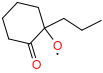

[O]O + CCC[C]1CCCCC1=O <=> CCCC1(OO)CCCCC1=O
[H] + CCCC1(O[O])CCCCC1=O <=> CCCC1(OO)CCCCC1=O
O=C1CCCC[C]1OO + [CH2]CC <=> CCCC1(OO)CCCCC1=O
[CH2]C1(OO)CCCCC1=O + C[CH2] <=> CCCC1(OO)CCCCC1=O
CC[CH]C1(OO)CCCCC1=O + [H] <=> CCCC1(OO)CCCCC1=O
CCCC1(OO)[CH]CCCC1=O + [H] <=> CCCC1(OO)CCCCC1=O
CCCC1(OO)C[CH]CCC1=O + [H] <=> CCCC1(OO)CCCCC1=O
CCCC1(OO)CC[CH]CC1=O + [H] <=> CCCC1(OO)CCCCC1=O
[CH2]CC1(OO)CCCCC1=O + [CH3] <=> CCCC1(OO)CCCCC1=O
C[CH]CC1(OO)CCCCC1=O + [H] <=> CCCC1(OO)CCCCC1=O
CCCC1(OO)CCC[CH]C1=O + [H] <=> CCCC1(OO)CCCCC1=O
[CH2]CCC1(OO)CCCCC1=O + [H] <=> CCCC1(OO)CCCCC1=O
[OH] + CC(=O)CC1([O])CCCCC1 <=> CC(=O)CC1(OO)CCCCC1


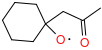

[O]O + CC(=O)C[C]1CCCCC1 <=> CC(=O)CC1(OO)CCCCC1
[H] + CC(=O)CC1(O[O])CCCCC1 <=> CC(=O)CC1(OO)CCCCC1
OO[C]1CCCCC1 + [CH2]C(C)=O <=> CC(=O)CC1(OO)CCCCC1
CC(=O)CC1(OO)[CH]CCCC1 + [H] <=> CC(=O)CC1(OO)CCCCC1
CC(=O)CC1(OO)C[CH]CCC1 + [H] <=> CC(=O)CC1(OO)CCCCC1
CC(=O)CC1(OO)CC[CH]CC1 + [H] <=> CC(=O)CC1(OO)CCCCC1
[CH2]C1(OO)CCCCC1 + C[C]=O <=> CC(=O)CC1(OO)CCCCC1
CC(=O)[CH]C1(OO)CCCCC1 + [H] <=> CC(=O)CC1(OO)CCCCC1
O=[C]CC1(OO)CCCCC1 + [CH3] <=> CC(=O)CC1(OO)CCCCC1
[CH2]C(=O)CC1(OO)CCCCC1 + [H] <=> CC(=O)CC1(OO)CCCCC1
[OH] + CC(=O)C([O])C1CCCCC1 <=> CC(=O)C(OO)C1CCCCC1


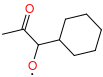

[O]O + CC(=O)[CH]C1CCCCC1 <=> CC(=O)C(OO)C1CCCCC1
[H] + CC(=O)C(O[O])C1CCCCC1 <=> CC(=O)C(OO)C1CCCCC1
CC(=O)[CH]OO + [CH]1CCCCC1 <=> CC(=O)C(OO)C1CCCCC1
CC(=O)C(OO)[C]1CCCCC1 + [H] <=> CC(=O)C(OO)C1CCCCC1
OO[CH]C1CCCCC1 + C[C]=O <=> CC(=O)C(OO)C1CCCCC1
CC(=O)[C](OO)C1CCCCC1 + [H] <=> CC(=O)C(OO)C1CCCCC1
CC(=O)C(OO)C1[CH]CCCC1 + [H] <=> CC(=O)C(OO)C1CCCCC1
CC(=O)C(OO)C1C[CH]CCC1 + [H] <=> CC(=O)C(OO)C1CCCCC1
CC(=O)C(OO)C1CC[CH]CC1 + [H] <=> CC(=O)C(OO)C1CCCCC1
O=[C]C(OO)C1CCCCC1 + [CH3] <=> CC(=O)C(OO)C1CCCCC1
[CH2]C(=O)C(OO)C1CCCCC1 + [H] <=> CC(=O)C(OO)C1CCCCC1
[OH] + CC([O])C(=O)C1CCCCC1 <=> CC(OO)C(=O)C1CCCCC1


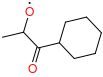

[O]O + C[CH]C(=O)C1CCCCC1 <=> CC(OO)C(=O)C1CCCCC1
[H] + CC(O[O])C(=O)C1CCCCC1 <=> CC(OO)C(=O)C1CCCCC1
CC([C]=O)OO + [CH]1CCCCC1 <=> CC(OO)C(=O)C1CCCCC1
CC(OO)C(=O)[C]1CCCCC1 + [H] <=> CC(OO)C(=O)C1CCCCC1
CC(OO)C(=O)C1[CH]CCCC1 + [H] <=> CC(OO)C(=O)C1CCCCC1
CC(OO)C(=O)C1C[CH]CCC1 + [H] <=> CC(OO)C(=O)C1CCCCC1
CC(OO)C(=O)C1CC[CH]CC1 + [H] <=> CC(OO)C(=O)C1CCCCC1
O=C([CH]OO)C1CCCCC1 + [CH3] <=> CC(OO)C(=O)C1CCCCC1
C[CH]OO + O=[C]C1CCCCC1 <=> CC(OO)C(=O)C1CCCCC1
C[C](OO)C(=O)C1CCCCC1 + [H] <=> CC(OO)C(=O)C1CCCCC1
[CH2]C(OO)C(=O)C1CCCCC1 + [H] <=> CC(OO)C(=O)C1CCCCC1
[OH] + CCC([O])C1CCCC(=O)C1 <=> CCC(OO)C1CCCC(=O)C1


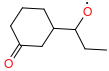

[O]O + CC[CH]C1CCCC(=O)C1 <=> CCC(OO)C1CCCC(=O)C1
[H] + CCC(O[O])C1CCCC(=O)C1 <=> CCC(OO)C1CCCC(=O)C1
CC[CH]OO + O=C1C[CH]CCC1 <=> CCC(OO)C1CCCC(=O)C1
CCC(OO)[C]1CCCC(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
O=C1CCCC([CH]OO)C1 + C[CH2] <=> CCC(OO)C1CCCC(=O)C1
CC[C](OO)C1CCCC(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
CCC(OO)C1[CH]CCC(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
CCC(OO)C1C[CH]CC(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
[CH2]C(OO)C1CCCC(=O)C1 + [CH3] <=> CCC(OO)C1CCCC(=O)C1
C[CH]C(OO)C1CCCC(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
CCC(OO)C1[CH]C(=O)CCC1 + [H] <=> CCC(OO)C1CCCC(=O)C1
CCC(OO)C1CC[CH]C(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
[CH2]CC(OO)C1CCCC(=O)C1 + [H] <=> CCC(OO)C1CCCC(=O)C1
[OH] + CCC(=O)C1CCCC([O])C1 <=> CCC(=O)C1CCCC(OO)C1


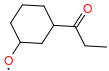

[O]O + CCC(=O)C1C[CH]CCC1 <=> CCC(=O)C1CCCC(OO)C1
[H] + CCC(=O)C1CCCC(O[O])C1 <=> CCC(=O)C1CCCC(OO)C1
OOC1C[CH]CCC1 + CC[C]=O <=> CCC(=O)C1CCCC(OO)C1
CCC(=O)[C]1CCCC(OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
CCC(=O)C1CCC[C](OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
CCC(=O)C1[CH]C(OO)CCC1 + [H] <=> CCC(=O)C1CCCC(OO)C1
CCC(=O)C1[CH]CCC(OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
CCC(=O)C1CC[CH]C(OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
CCC(=O)C1C[CH]CC(OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
[CH2]C(=O)C1CCCC(OO)C1 + [CH3] <=> CCC(=O)C1CCCC(OO)C1
O=[C]C1CCCC(OO)C1 + C[CH2] <=> CCC(=O)C1CCCC(OO)C1
C[CH]C(=O)C1CCCC(OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
[CH2]CC(=O)C1CCCC(OO)C1 + [H] <=> CCC(=O)C1CCCC(OO)C1
[OH] + CCCC1C(=O)CCCC1[O] <=> CCCC1C(=O)CCCC1OO


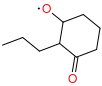

[O]O + CCCC1[CH]CCCC1=O <=> CCCC1C(=O)CCCC1OO
[H] + CCCC1C(=O)CCCC1O[O] <=> CCCC1C(=O)CCCC1OO
O=C1[CH]C(OO)CCC1 + [CH2]CC <=> CCCC1C(=O)CCCC1OO
CCC[C]1C(=O)CCCC1OO + [H] <=> CCCC1C(=O)CCCC1OO
CCCC1[C](OO)CCCC1=O + [H] <=> CCCC1C(=O)CCCC1OO
[CH2]C1C(=O)CCCC1OO + C[CH2] <=> CCCC1C(=O)CCCC1OO
CC[CH]C1C(=O)CCCC1OO + [H] <=> CCCC1C(=O)CCCC1OO
CCCC1C(=O)CC[CH]C1OO + [H] <=> CCCC1C(=O)CCCC1OO
CCCC1C(=O)C[CH]CC1OO + [H] <=> CCCC1C(=O)CCCC1OO
[CH2]CC1C(=O)CCCC1OO + [CH3] <=> CCCC1C(=O)CCCC1OO
C[CH]CC1C(=O)CCCC1OO + [H] <=> CCCC1C(=O)CCCC1OO
CCCC1C(=O)[CH]CCC1OO + [H] <=> CCCC1C(=O)CCCC1OO
[CH2]CCC1C(=O)CCCC1OO + [H] <=> CCCC1C(=O)CCCC1OO
[OH] + CCCC1CC(=O)CC([O])C1 <=> CCCC1CC(=O)CC(OO)C1


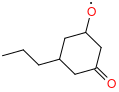

[O]O + CCCC1C[CH]CC(=O)C1 <=> CCCC1CC(=O)CC(OO)C1
[H] + CCCC1CC(=O)CC(O[O])C1 <=> CCCC1CC(=O)CC(OO)C1
O=C1C[CH]CC(OO)C1 + [CH2]CC <=> CCCC1CC(=O)CC(OO)C1
CCC[C]1CC(=O)CC(OO)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
CCCC1C[C](OO)CC(=O)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
CCCC1[CH]C(OO)CC(=O)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
[CH2]C1CC(=O)CC(OO)C1 + C[CH2] <=> CCCC1CC(=O)CC(OO)C1
CC[CH]C1CC(=O)CC(OO)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
[CH2]CC1CC(=O)CC(OO)C1 + [CH3] <=> CCCC1CC(=O)CC(OO)C1
C[CH]CC1CC(=O)CC(OO)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
CCCC1[CH]C(=O)CC(OO)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
CCCC1CC(=O)[CH]C(OO)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
[CH2]CCC1CC(=O)CC(OO)C1 + [H] <=> CCCC1CC(=O)CC(OO)C1
[OH] + CC([O])CC1CCC(=O)CC1 <=> CC(CC1CCC(=O)CC1)OO


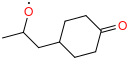

[O]O + C[CH]CC1CCC(=O)CC1 <=> CC(CC1CCC(=O)CC1)OO
[H] + CC(CC1CCC(=O)CC1)O[O] <=> CC(CC1CCC(=O)CC1)OO
[CH2]C(C)OO + O=C1CC[CH]CC1 <=> CC(CC1CCC(=O)CC1)OO
CC(C[C]1CCC(=O)CC1)OO + [H] <=> CC(CC1CCC(=O)CC1)OO
C[CH]OO + [CH2]C1CCC(=O)CC1 <=> CC(CC1CCC(=O)CC1)OO
O=C1CCC(C[CH]OO)CC1 + [CH3] <=> CC(CC1CCC(=O)CC1)OO
C[C](CC1CCC(=O)CC1)OO + [H] <=> CC(CC1CCC(=O)CC1)OO
CC([CH]C1CCC(=O)CC1)OO + [H] <=> CC(CC1CCC(=O)CC1)OO
CC(CC1[CH]CC(=O)CC1)OO + [H] <=> CC(CC1CCC(=O)CC1)OO
CC(CC1C[CH]C(=O)CC1)OO + [H] <=> CC(CC1CCC(=O)CC1)OO
[CH2]C(CC1CCC(=O)CC1)OO + [H] <=> CC(CC1CCC(=O)CC1)OO
[OH] + CCCC1CCC([O])CC1=O <=> CCCC1CCC(OO)CC1=O


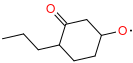

[O]O + CCCC1CC[CH]CC1=O <=> CCCC1CCC(OO)CC1=O
[H] + CCCC1CCC(O[O])CC1=O <=> CCCC1CCC(OO)CC1=O
O=C1[CH]CCC(OO)C1 + [CH2]CC <=> CCCC1CCC(OO)CC1=O
CCC[C]1CCC(OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
CCCC1CC[C](OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
CCCC1[CH]CC(OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
[CH2]C1CCC(OO)CC1=O + C[CH2] <=> CCCC1CCC(OO)CC1=O
CC[CH]C1CCC(OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
CCCC1C[CH]C(OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
[CH2]CC1CCC(OO)CC1=O + [CH3] <=> CCCC1CCC(OO)CC1=O
C[CH]CC1CCC(OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
CCCC1CCC(OO)[CH]C1=O + [H] <=> CCCC1CCC(OO)CC1=O
[CH2]CCC1CCC(OO)CC1=O + [H] <=> CCCC1CCC(OO)CC1=O
[OH] + [O]CCC(=O)C1CCCCC1 <=> O=C(CCOO)C1CCCCC1


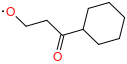

[O]O + [CH2]CC(=O)C1CCCCC1 <=> O=C(CCOO)C1CCCCC1
[H] + [O]OCCC(=O)C1CCCCC1 <=> O=C(CCOO)C1CCCCC1
O=[C]CCOO + [CH]1CCCCC1 <=> O=C(CCOO)C1CCCCC1
O=C(CCOO)[C]1CCCCC1 + [H] <=> O=C(CCOO)C1CCCCC1
O=C(CCOO)C1[CH]CCCC1 + [H] <=> O=C(CCOO)C1CCCCC1
O=C(CCOO)C1C[CH]CCC1 + [H] <=> O=C(CCOO)C1CCCCC1
O=C(CCOO)C1CC[CH]CC1 + [H] <=> O=C(CCOO)C1CCCCC1
[CH2]OO + [CH2]C(=O)C1CCCCC1 <=> O=C(CCOO)C1CCCCC1
[CH2]COO + O=[C]C1CCCCC1 <=> O=C(CCOO)C1CCCCC1
O=C([CH]COO)C1CCCCC1 + [H] <=> O=C(CCOO)C1CCCCC1
O=C(C[CH]OO)C1CCCCC1 + [H] <=> O=C(CCOO)C1CCCCC1
[OH] + [O]C(CC=O)C1CCCCC1 <=> O=CCC(OO)C1CCCCC1


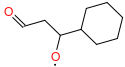

[O]O + O=CC[CH]C1CCCCC1 <=> O=CCC(OO)C1CCCCC1
[H] + [O]OC(CC=O)C1CCCCC1 <=> O=CCC(OO)C1CCCCC1
O=CC[CH]OO + [CH]1CCCCC1 <=> O=CCC(OO)C1CCCCC1
O=CCC(OO)[C]1CCCCC1 + [H] <=> O=CCC(OO)C1CCCCC1
OO[CH]C1CCCCC1 + [CH2]C=O <=> O=CCC(OO)C1CCCCC1
O=CC[C](OO)C1CCCCC1 + [H] <=> O=CCC(OO)C1CCCCC1
O=CCC(OO)C1[CH]CCCC1 + [H] <=> O=CCC(OO)C1CCCCC1
O=CCC(OO)C1C[CH]CCC1 + [H] <=> O=CCC(OO)C1CCCCC1
O=CCC(OO)C1CC[CH]CC1 + [H] <=> O=CCC(OO)C1CCCCC1
[CH2]C(OO)C1CCCCC1 + [CH]=O <=> O=CCC(OO)C1CCCCC1
O=C[CH]C(OO)C1CCCCC1 + [H] <=> O=CCC(OO)C1CCCCC1
O=[C]CC(OO)C1CCCCC1 + [H] <=> O=CCC(OO)C1CCCCC1
[OH] + CC([O])CC1CCCCC1=O <=> CC(CC1CCCCC1=O)OO


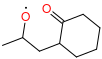

[O]O + C[CH]CC1CCCCC1=O <=> CC(CC1CCCCC1=O)OO
[H] + CC(CC1CCCCC1=O)O[O] <=> CC(CC1CCCCC1=O)OO
[CH2]C(C)OO + O=C1[CH]CCCC1 <=> CC(CC1CCCCC1=O)OO
CC(C[C]1CCCCC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
C[CH]OO + [CH2]C1CCCCC1=O <=> CC(CC1CCCCC1=O)OO
O=C1CCCCC1C[CH]OO + [CH3] <=> CC(CC1CCCCC1=O)OO
C[C](CC1CCCCC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
CC([CH]C1CCCCC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
CC(CC1[CH]CCCC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
CC(CC1C[CH]CCC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
CC(CC1CC[CH]CC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
CC(CC1CCC[CH]C1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
[CH2]C(CC1CCCCC1=O)OO + [H] <=> CC(CC1CCCCC1=O)OO
[OH] + [O]C1CCCC(CCC=O)C1 <=> O=CCCC1CCCC(OO)C1


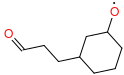

[O]O + O=CCCC1C[CH]CCC1 <=> O=CCCC1CCCC(OO)C1
[H] + [O]OC1CCCC(CCC=O)C1 <=> O=CCCC1CCCC(OO)C1
OOC1C[CH]CCC1 + [CH2]CC=O <=> O=CCCC1CCCC(OO)C1
O=CCC[C]1CCCC(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
O=CCCC1CCC[C](OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
O=CCCC1[CH]C(OO)CCC1 + [H] <=> O=CCCC1CCCC(OO)C1
O=CCCC1[CH]CCC(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
[CH2]C1CCCC(OO)C1 + [CH2]C=O <=> O=CCCC1CCCC(OO)C1
O=CC[CH]C1CCCC(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
O=CCCC1CC[CH]C(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
O=CCCC1C[CH]CC(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
[CH2]CC1CCCC(OO)C1 + [CH]=O <=> O=CCCC1CCCC(OO)C1
O=C[CH]CC1CCCC(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
O=[C]CCC1CCCC(OO)C1 + [H] <=> O=CCCC1CCCC(OO)C1
[OH] + [O]CCCC1CCCC(=O)C1 <=> O=C1CCCC(CCCOO)C1


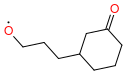

[O]O + [CH2]CCC1CCCC(=O)C1 <=> O=C1CCCC(CCCOO)C1
[H] + [O]OCCCC1CCCC(=O)C1 <=> O=C1CCCC(CCCOO)C1
[CH2]CCOO + O=C1C[CH]CCC1 <=> O=C1CCCC(CCCOO)C1
O=C1CCC[C](CCCOO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
[CH2]COO + [CH2]C1CCCC(=O)C1 <=> O=C1CCCC(CCCOO)C1
O=C1CCCC([CH]CCOO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
O=C1CC[CH]C(CCCOO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
O=C1C[CH]CC(CCCOO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
[CH2]OO + [CH2]CC1CCCC(=O)C1 <=> O=C1CCCC(CCCOO)C1
O=C1CCCC(C[CH]COO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
O=C1[CH]C(CCCOO)CCC1 + [H] <=> O=C1CCCC(CCCOO)C1
O=C1[CH]CCC(CCCOO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
O=C1CCCC(CC[CH]OO)C1 + [H] <=> O=C1CCCC(CCCOO)C1
[OH] + CC(=O)CC1CCCCC1[O] <=> CC(=O)CC1CCCCC1OO


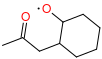

[O]O + CC(=O)CC1[CH]CCCC1 <=> CC(=O)CC1CCCCC1OO
[H] + CC(=O)CC1CCCCC1O[O] <=> CC(=O)CC1CCCCC1OO
OOC1[CH]CCCC1 + [CH2]C(C)=O <=> CC(=O)CC1CCCCC1OO
CC(=O)C[C]1CCCCC1OO + [H] <=> CC(=O)CC1CCCCC1OO
CC(=O)CC1CCCC[C]1OO + [H] <=> CC(=O)CC1CCCCC1OO
CC(=O)CC1[CH]CCCC1OO + [H] <=> CC(=O)CC1CCCCC1OO
CC(=O)CC1CCC[CH]C1OO + [H] <=> CC(=O)CC1CCCCC1OO
CC(=O)CC1C[CH]CCC1OO + [H] <=> CC(=O)CC1CCCCC1OO
CC(=O)CC1CC[CH]CC1OO + [H] <=> CC(=O)CC1CCCCC1OO
[CH2]C1CCCCC1OO + C[C]=O <=> CC(=O)CC1CCCCC1OO
CC(=O)[CH]C1CCCCC1OO + [H] <=> CC(=O)CC1CCCCC1OO
O=[C]CC1CCCCC1OO + [CH3] <=> CC(=O)CC1CCCCC1OO
[CH2]C(=O)CC1CCCCC1OO + [H] <=> CC(=O)CC1CCCCC1OO
[OH] + CC([O])CC1CCCC(=O)C1 <=> CC(CC1CCCC(=O)C1)OO


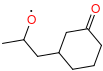

[O]O + C[CH]CC1CCCC(=O)C1 <=> CC(CC1CCCC(=O)C1)OO
[H] + CC(CC1CCCC(=O)C1)O[O] <=> CC(CC1CCCC(=O)C1)OO
[CH2]C(C)OO + O=C1C[CH]CCC1 <=> CC(CC1CCCC(=O)C1)OO
CC(C[C]1CCCC(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
C[CH]OO + [CH2]C1CCCC(=O)C1 <=> CC(CC1CCCC(=O)C1)OO
O=C1CCCC(C[CH]OO)C1 + [CH3] <=> CC(CC1CCCC(=O)C1)OO
C[C](CC1CCCC(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
CC([CH]C1CCCC(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
CC(CC1[CH]CCC(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
CC(CC1C[CH]CC(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
CC(CC1[CH]C(=O)CCC1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
CC(CC1CC[CH]C(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO
[CH2]C(CC1CCCC(=O)C1)OO + [H] <=> CC(CC1CCCC(=O)C1)OO


In [ ]:
# The ketohydroperoxide can now break its O-OH and form an alkoxy radical
for s in molecules['ketohydroperoxide']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m1 = r.reactants[0].molecule[0]
        m2 = r.reactants[1].molecule[0]
        if m1.get_formula() == 'HO':
            display(m2)
            molecules['alkoxy_radical'].add(m2)
            molecules['OH'].add(m1)
        if m2.get_formula() == 'HO':
            display(m1)
            molecules['alkoxy_radical'].add(m1)
            molecules['OH'].add(m2)
molecules['alkoxy_radical']

Applying HO2_Elimination_from_PeroxyRadical
CCCCCCC(CC(C)O[O])OO <=> CC=CC(CCCCCC)OO + [O]O


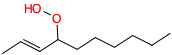

CCCCCCC(CC(C)O[O])OO <=> C=CCC(CCCCCC)OO + [O]O


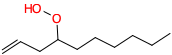

CCCC(CCC(CCC)OO)O[O] <=> CCC=CCCC(CCC)OO + [O]O


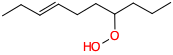

CCCC(CCC(CCC)OO)O[O] <=> CCCC=CCC(CCC)OO + [O]O


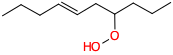

CCCCCCC(CCCO[O])OO <=> C=CCC(CCCCCC)OO + [O]O


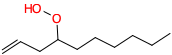

CCCC(CCCC(CC)O[O])OO <=> CCC=CCCC(CCC)OO + [O]O


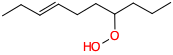

CCCC(CCCC(CC)O[O])OO <=> CC=CCCCC(CCC)OO + [O]O


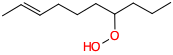

CCCC(CCCCC(C)O[O])OO <=> CC=CCCCC(CCC)OO + [O]O


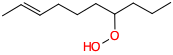

CCCC(CCCCC(C)O[O])OO <=> C=CCCCCC(CCC)OO + [O]O


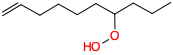

CCCCC(CCC(CC)O[O])OO <=> CCC=CCC(CCCC)OO + [O]O


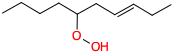

CCCCC(CCC(CC)O[O])OO <=> CC=CCCC(CCCC)OO + [O]O


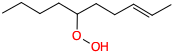

CCCCCC(CCCC)(O[O])OO <=> CCCCC=C(CCCC)OO + [O]O


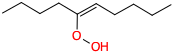

CCCCCC(CCCC)(O[O])OO <=> CCCC=C(CCCCC)OO + [O]O


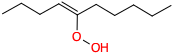

CCCCC(O[O])C(CCCC)OO <=> CCCCC=C(CCCC)OO + [O]O


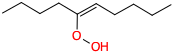

CCCCC(O[O])C(CCCC)OO <=> CCCC=CC(CCCC)OO + [O]O


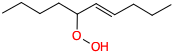

CCCCCC(OO)C(CCC)O[O] <=> CCCC=C(CCCCC)OO + [O]O


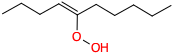

CCCCCC(OO)C(CCC)O[O] <=> CCC=CC(CCCCC)OO + [O]O


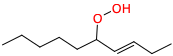

CCCCC(CC(CCC)O[O])OO <=> CCCC=CC(CCCC)OO + [O]O


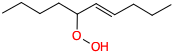

CCCCC(CC(CCC)O[O])OO <=> CCC=CCC(CCCC)OO + [O]O


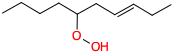

CCCCCCCC(O[O])C(C)OO <=> CCCCCCCC=C(C)OO + [O]O


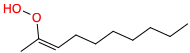

CCCCCCCC(O[O])C(C)OO <=> CCCCCCC=CC(C)OO + [O]O


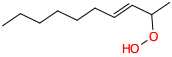

CCCCCC(CC(CC)O[O])OO <=> CCC=CC(CCCCC)OO + [O]O


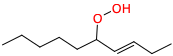

CCCCCC(CC(CC)O[O])OO <=> CC=CCC(CCCCC)OO + [O]O


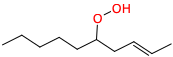

CCCCCCC(CCC)(O[O])OO <=> CCCCCC=C(CCC)OO + [O]O


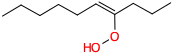

CCCCCCC(CCC)(O[O])OO <=> CCC=C(CCCCCC)OO + [O]O


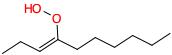

CCCCCC(O[O])C(CCC)OO <=> CCCCCC=C(CCC)OO + [O]O


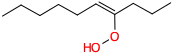

CCCCCC(O[O])C(CCC)OO <=> CCCCC=CC(CCC)OO + [O]O


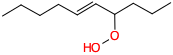

CCCCCCC(OO)C(CC)O[O] <=> CCC=C(CCCCCC)OO + [O]O


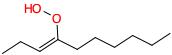

CCCCCCC(OO)C(CC)O[O] <=> CC=CC(CCCCCC)OO + [O]O


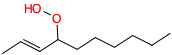

CCCCC(CC(CCC)OO)O[O] <=> CCCCC=CC(CCC)OO + [O]O


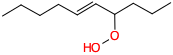

CCCCC(CC(CCC)OO)O[O] <=> CCCC=CCC(CCC)OO + [O]O


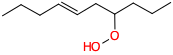

CCCCCC(CCCCOO)O[O] <=> CCCCC=CCCCCOO + [O]O


CCCCCC(CCCCOO)O[O] <=> CCCCCC=CCCCOO + [O]O


CCCCC(CCCCCOO)O[O] <=> CCCC=CCCCCCOO + [O]O


CCCCC(CCCCCOO)O[O] <=> CCCCC=CCCCCOO + [O]O


CCCCCCC(CC(C)OO)O[O] <=> CCCCCCC=CC(C)OO + [O]O


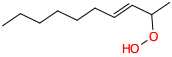

CCCCCCC(CC(C)OO)O[O] <=> CCCCCC=CCC(C)OO + [O]O


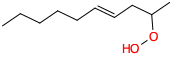

CCCCCCCCC(C)(O[O])OO <=> CCCCCCCC=C(C)OO + [O]O


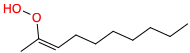

CCCCCCCCC(C)(O[O])OO <=> C=C(CCCCCCCC)OO + [O]O


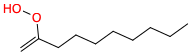

CCCCCCCCC(CO[O])OO <=> C=C(CCCCCCCC)OO + [O]O


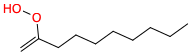

CCCCC(CCCC(C)OO)O[O] <=> CCCC=CCCCC(C)OO + [O]O


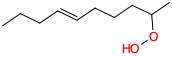

CCCCC(CCCC(C)OO)O[O] <=> CCCCC=CCCC(C)OO + [O]O


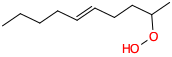

CCCC(CCCCC(C)OO)O[O] <=> CCC=CCCCCC(C)OO + [O]O


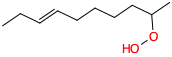

CCCC(CCCCC(C)OO)O[O] <=> CCCC=CCCCC(C)OO + [O]O


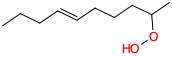

CCCCCCCC(CC)(O[O])OO <=> CCCCCCC=C(CC)OO + [O]O


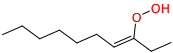

CCCCCCCC(CC)(O[O])OO <=> CC=C(CCCCCCC)OO + [O]O


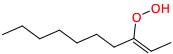

CCCCCCC(O[O])C(CC)OO <=> CCCCCCC=C(CC)OO + [O]O


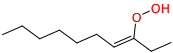

CCCCCCC(O[O])C(CC)OO <=> CCCCCC=CC(CC)OO + [O]O


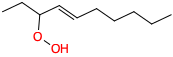

CCCCCCCC(OO)C(C)O[O] <=> CC=C(CCCCCCC)OO + [O]O


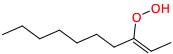

CCCCCCCC(OO)C(C)O[O] <=> C=CC(CCCCCCC)OO + [O]O


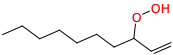

CCCCC(CCCCCO[O])OO <=> C=CCCCC(CCCC)OO + [O]O


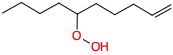

CCCCCCCCC(COO)O[O] <=> CCCCCCCC=CCOO + [O]O


CCCCCCCCC(COO)O[O] <=> CCCCCCCCC=COO + [O]O


CCCCCCCC(CCOO)O[O] <=> CCCCCCC=CCCOO + [O]O


CCCCCCCC(CCOO)O[O] <=> CCCCCCCC=CCOO + [O]O


CCCCC(CCCC(C)O[O])OO <=> CC=CCCC(CCCC)OO + [O]O


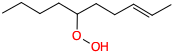

CCCCC(CCCC(C)O[O])OO <=> C=CCCCC(CCCC)OO + [O]O


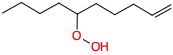

CCCCCC(CCC(C)OO)O[O] <=> CCCCC=CCCC(C)OO + [O]O


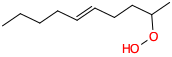

CCCCCC(CCC(C)OO)O[O] <=> CCCCCC=CCC(C)OO + [O]O


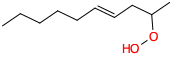

CCCCCCCCCC(O[O])OO <=> CCCCCCCCC=COO + [O]O


CCCCCC(CCCCO[O])OO <=> C=CCCC(CCCCC)OO + [O]O


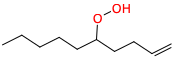

CCCCCC(CCC(C)O[O])OO <=> CC=CCC(CCCCC)OO + [O]O


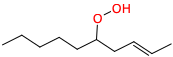

CCCCCC(CCC(C)O[O])OO <=> C=CCCC(CCCCC)OO + [O]O


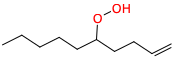

CCCCCC(CC(CC)OO)O[O] <=> CCCCCC=CC(CC)OO + [O]O


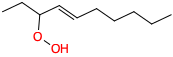

CCCCCC(CC(CC)OO)O[O] <=> CCCCC=CCC(CC)OO + [O]O


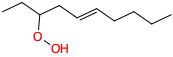

CCCCCCCC(CCO[O])OO <=> C=CC(CCCCCCC)OO + [O]O


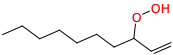

CCCCC(CCC(CC)OO)O[O] <=> CCCC=CCCC(CC)OO + [O]O


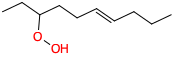

CCCCC(CCC(CC)OO)O[O] <=> CCCCC=CCC(CC)OO + [O]O


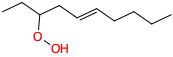

CCCC(CCCC(CC)OO)O[O] <=> CCC=CCCCC(CC)OO + [O]O


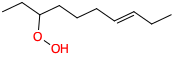

CCCC(CCCC(CC)OO)O[O] <=> CCCC=CCCC(CC)OO + [O]O


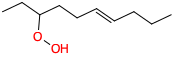

CCC(CCCCC(CC)OO)O[O] <=> CCC=CCCCC(CC)OO + [O]O


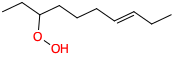

CCC(CCCCC(CC)OO)O[O] <=> CC=CCCCCC(CC)OO + [O]O


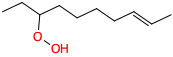

CCCCCCC(CCCOO)O[O] <=> CCCCCC=CCCCOO + [O]O


CCCCCCC(CCCOO)O[O] <=> CCCCCCC=CCCOO + [O]O


QeneOOH


{Molecule(smiles="CCC=CCCCCC(C)OO"),
 Molecule(smiles="CCCCCCC=C(CC)OO"),
 Molecule(smiles="CC=C(CCCCCCC)OO"),
 Molecule(smiles="CCCCCC=CC(CC)OO"),
 Molecule(smiles="C=CC(CCCCCCC)OO"),
 Molecule(smiles="C=CCCCC(CCCC)OO"),
 Molecule(smiles="CCCCCCCC=CCOO"),
 Molecule(smiles="CCCCCCCCC=COO"),
 Molecule(smiles="CCCCCCC=CCCOO"),
 Molecule(smiles="C=CCCC(CCCCC)OO"),
 Molecule(smiles="CCCCCCCC=C(C)OO"),
 Molecule(smiles="CCCCCCC=CC(C)OO"),
 Molecule(smiles="CC=CCC(CCCCC)OO"),
 Molecule(smiles="CCCCCC=C(CCC)OO"),
 Molecule(smiles="CCC=C(CCCCCC)OO"),
 Molecule(smiles="CCCCC=CC(CCC)OO"),
 Molecule(smiles="CCCCC=CCCCCOO"),
 Molecule(smiles="CCCC=CCC(CCC)OO"),
 Molecule(smiles="C=CCC(CCCCCC)OO"),
 Molecule(smiles="CCC=CCCC(CCC)OO"),
 Molecule(smiles="CCCC=CCCC(CC)OO"),
 Molecule(smiles="CCC=CCCCC(CC)OO"),
 Molecule(smiles="CC=CCCCCC(CC)OO"),
 Molecule(smiles="CCCCCC=CCC(C)OO"),
 Molecule(smiles="C=C(CCCCCCCC)OO"),
 Molecule(smiles="CCCC=CCCCC(C)OO"),
 Molecule(smiles="CCCCC=CCCC(C)OO"),
 Molecule

In [23]:
# HO2_Elimination_from_PeroxyRadical applied to QOOH makes an Alkene-OOH
print("Applying HO2_Elimination_from_PeroxyRadical")
for s in molecules['O2QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families(
        (s,), only_families='HO2_Elimination_from_PeroxyRadical')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['QeneOOH'].add(m)
print('QeneOOH')
molecules['QeneOOH']

[H] + CCCCCCCCC(C)O[O] <=> CCCCCCCCC(C)OO


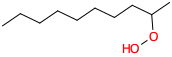

[H] + CCCCCCCC(CC)O[O] <=> CCCCCCCC(CC)OO


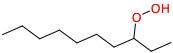

[H] + CCCCCC(CCCC)O[O] <=> CCCCCC(CCCC)OO


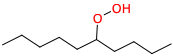

[H] + CCCCCCCCCCO[O] <=> CCCCCCCCCCOO


[H] + CCCCCCC(CCC)O[O] <=> CCCCCCC(CCC)OO


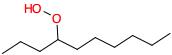

ROOH


{Molecule(smiles="CCCCCCCC(CC)OO"),
 Molecule(smiles="CCCCCC(CCCC)OO"),
 Molecule(smiles="CCCCCCCCC(C)OO"),
 Molecule(smiles="CCCCCCCCCCOO"),
 Molecule(smiles="CCCCCCC(CCC)OO")}

In [24]:
# Another chain-brainching route.
# Add H to RO2 to make ROOH (which in the next cell becomes RO and OH)
# This would happen by abstracting an H from some fuel, but 
# here we can make the same species by just adding an H atom.
h = list(molecules['H'])[0]
for s in molecules['ROO']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,h), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['ROOH'].add(m)
print('ROOH')
molecules['ROOH']

[OH] + CCCCCCCC([O])CC <=> CCCCCCCC(CC)OO


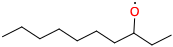

[O]O + CC[CH]CCCCCCC <=> CCCCCCCC(CC)OO
[H] + CCCCCCCC(CC)O[O] <=> CCCCCCCC(CC)OO
CC[CH]OO + [CH2]CCCCCC <=> CCCCCCCC(CC)OO
CCCCCCC[CH]OO + C[CH2] <=> CCCCCCCC(CC)OO
CCCCCCC[C](CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]C(CC)OO + [CH2]CCCCC <=> CCCCCCCC(CC)OO
CCCCCC[CH]C(CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]CCCC(CC)OO + [CH2]CC <=> CCCCCCCC(CC)OO
[CH2]CCCCC(CC)OO + C[CH2] <=> CCCCCCCC(CC)OO
CC[CH]CCCCC(CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]CCC(CC)OO + [CH2]CCC <=> CCCCCCCC(CC)OO
CCC[CH]CCCC(CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]CC(CC)OO + [CH2]CCCC <=> CCCCCCCC(CC)OO
CCCC[CH]CCC(CC)OO + [H] <=> CCCCCCCC(CC)OO
CCCCC[CH]CC(CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]C(CCCCCCC)OO + [CH3] <=> CCCCCCCC(CC)OO
C[CH]C(CCCCCCC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]CCCCCC(CC)OO + [CH3] <=> CCCCCCCC(CC)OO
C[CH]CCCCCC(CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]CCCCCCC(CC)OO + [H] <=> CCCCCCCC(CC)OO
[CH2]CC(CCCCCCC)OO + [H] <=> CCCCCCCC(CC)OO
[OH] + CCCCCC([O])CCCC <=> CCCCCC(CCCC)OO


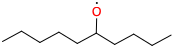

[O]O + CCCC[CH]CCCCC <=> CCCCCC(CCCC)OO
[H] + CCCCCC(CCCC)O[O] <=> CCCCCC(CCCC)OO
CCCC[CH]OO + [CH2]CCCC <=> CCCCCC(CCCC)OO
CCCCC[CH]OO + [CH2]CCC <=> CCCCCC(CCCC)OO
CCCCC[C](CCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]C(CCCC)OO + [CH2]CCC <=> CCCCCC(CCCC)OO
CCCC[CH]C(CCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]C(CCCCC)OO + [CH2]CC <=> CCCCCC(CCCC)OO
CCC[CH]C(CCCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]CC(CCCC)OO + [CH2]CC <=> CCCCCC(CCCC)OO
[CH2]CCC(CCCC)OO + C[CH2] <=> CCCCCC(CCCC)OO
CC[CH]CCC(CCCC)OO + [H] <=> CCCCCC(CCCC)OO
CCC[CH]CC(CCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]CC(CCCCC)OO + C[CH2] <=> CCCCCC(CCCC)OO
CC[CH]CC(CCCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]CCCC(CCCC)OO + [CH3] <=> CCCCCC(CCCC)OO
C[CH]CCCC(CCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]CCC(CCCCC)OO + [CH3] <=> CCCCCC(CCCC)OO
C[CH]CCC(CCCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]CCCCC(CCCC)OO + [H] <=> CCCCCC(CCCC)OO
[CH2]CCCC(CCCCC)OO + [H] <=> CCCCCC(CCCC)OO
[OH] + CCCCCCCCC(C)[O] <=> CCCCCCCCC(C)OO


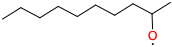

[O]O + C[CH]CCCCCCCC <=> CCCCCCCCC(C)OO
[H] + CCCCCCCCC(C)O[O] <=> CCCCCCCCC(C)OO
C[CH]OO + [CH2]CCCCCCC <=> CCCCCCCCC(C)OO
CCCCCCCC[CH]OO + [CH3] <=> CCCCCCCCC(C)OO
CCCCCCCC[C](C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]C(C)OO + [CH2]CCCCCC <=> CCCCCCCCC(C)OO
CCCCCCC[CH]C(C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]CCCCC(C)OO + [CH2]CC <=> CCCCCCCCC(C)OO
[CH2]CCCCCC(C)OO + C[CH2] <=> CCCCCCCCC(C)OO
CC[CH]CCCCCC(C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]CCCC(C)OO + [CH2]CCC <=> CCCCCCCCC(C)OO
CCC[CH]CCCCC(C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]CCC(C)OO + [CH2]CCCC <=> CCCCCCCCC(C)OO
CCCC[CH]CCCC(C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]CC(C)OO + [CH2]CCCCC <=> CCCCCCCCC(C)OO
CCCCC[CH]CCC(C)OO + [H] <=> CCCCCCCCC(C)OO
CCCCCC[CH]CC(C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]CCCCCCC(C)OO + [CH3] <=> CCCCCCCCC(C)OO
C[CH]CCCCCCC(C)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]C(CCCCCCCC)OO + [H] <=> CCCCCCCCC(C)OO
[CH2]CCCCCCCC(C)OO + [H] <=> CCCCCCCCC(C)OO
[OH] + CCCCCCCCCC[O] <=> CCCCCCCCCCOO


[O]O + [CH2]CCCCCCCCC <=> CCCCCCCCCCOO
[H] + CCCCCCCCCCO[O] <=> CCCCCCCCCCOO
[CH2]CCCCCCOO + [CH2]CC <=> CCCCCCCCCCOO
[CH2]CCCCCCCOO + C[CH2] <=> CCCCCCCCCCOO
CC[CH]CCCCCCCOO + [H] <=> CCCCCCCCCCOO
[CH2]CCCCCOO + [CH2]CCC <=> CCCCCCCCCCOO
CCC[CH]CCCCCCOO + [H] <=> CCCCCCCCCCOO
[CH2]CCCCOO + [CH2]CCCC <=> CCCCCCCCCCOO
CCCC[CH]CCCCCOO + [H] <=> CCCCCCCCCCOO
[CH2]CCCOO + [CH2]CCCCC <=> CCCCCCCCCCOO
CCCCC[CH]CCCCOO + [H] <=> CCCCCCCCCCOO
[CH2]CCOO + [CH2]CCCCCC <=> CCCCCCCCCCOO
CCCCCC[CH]CCCOO + [H] <=> CCCCCCCCCCOO
[CH2]COO + [CH2]CCCCCCC <=> CCCCCCCCCCOO
CCCCCCC[CH]CCOO + [H] <=> CCCCCCCCCCOO
[CH2]OO + [CH2]CCCCCCCC <=> CCCCCCCCCCOO
CCCCCCCC[CH]COO + [H] <=> CCCCCCCCCCOO
[CH2]CCCCCCCCOO + [CH3] <=> CCCCCCCCCCOO
C[CH]CCCCCCCCOO + [H] <=> CCCCCCCCCCOO
CCCCCCCCC[CH]OO + [H] <=> CCCCCCCCCCOO
[CH2]CCCCCCCCCOO + [H] <=> CCCCCCCCCCOO
[OH] + CCCCCCC([O])CCC <=> CCCCCCC(CCC)OO


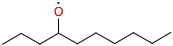

[O]O + CCC[CH]CCCCCC <=> CCCCCCC(CCC)OO
[H] + CCCCCCC(CCC)O[O] <=> CCCCCCC(CCC)OO
CCC[CH]OO + [CH2]CCCCC <=> CCCCCCC(CCC)OO
CCCCCC[CH]OO + [CH2]CC <=> CCCCCCC(CCC)OO
CCCCCC[C](CCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]C(CCC)OO + [CH2]CCCC <=> CCCCCCC(CCC)OO
CCCCC[CH]C(CCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]C(CCCCCC)OO + C[CH2] <=> CCCCCCC(CCC)OO
CC[CH]C(CCCCCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]CCC(CCC)OO + [CH2]CC <=> CCCCCCC(CCC)OO
[CH2]CCCC(CCC)OO + C[CH2] <=> CCCCCCC(CCC)OO
CC[CH]CCCC(CCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]CC(CCC)OO + [CH2]CCC <=> CCCCCCC(CCC)OO
CCC[CH]CCC(CCC)OO + [H] <=> CCCCCCC(CCC)OO
CCCC[CH]CC(CCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]CCCCC(CCC)OO + [CH3] <=> CCCCCCC(CCC)OO
C[CH]CCCCC(CCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]CC(CCCCCC)OO + [CH3] <=> CCCCCCC(CCC)OO
C[CH]CC(CCCCCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]CCCCCC(CCC)OO + [H] <=> CCCCCCC(CCC)OO
[CH2]CCC(CCCCCC)OO + [H] <=> CCCCCCC(CCC)OO


RO


{Molecule(smiles="CCCCCCCC([O])CC"),
 Molecule(smiles="CCCCCCC([O])CCC"),
 Molecule(smiles="CCCCCCCCCC[O]"),
 Molecule(smiles="CCCCCCCCC(C)[O]"),
 Molecule(smiles="CCCCCC([O])CCCC")}

In [25]:
# The ROOH then becomes RO and OH which is chain-brainching
for s in molecules['ROOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m1 = r.reactants[0].molecule[0]
        m2 = r.reactants[1].molecule[0]
        
        if m1.get_formula() == 'HO':
            display(m2)
            molecules['RO'].add(m2)
            molecules['OH'].add(m1)
        if m2.get_formula() == 'HO':
            display(m1)
            molecules['RO'].add(m1)
            molecules['OH'].add(m2)

print("\n\nRO")
molecules['RO']

Applying intra_OH_migration to QOOH
C[CH]CCC(CCCCC)OO <=> CCCCCC([O])CCC(C)O


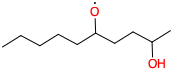

CCCCCCCCC[CH]OO <=> CCCCCCCCCC([O])O


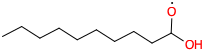

CCCCCCCC[CH]COO <=> CCCCCCCCC(O)C[O]


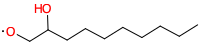

CCCCCCC[CH]CCOO <=> CCCCCCCC(O)CC[O]


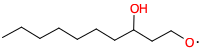

CCCCCC[CH]CCCOO <=> CCCCCCC(O)CCC[O]


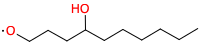

CCCCCC[CH]CC(C)OO <=> CCCCCCC(O)CC(C)[O]


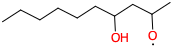

CCCCC[CH]CCC(C)OO <=> CCCCCC(O)CCC(C)[O]


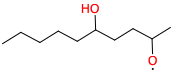

CCCCCCCC[C](C)OO <=> CCCCCCCCC(C)([O])O


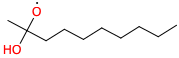

[CH2]C(CCCCCCCC)OO <=> CCCCCCCCC([O])CO


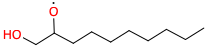

CCCCCCC[C](CC)OO <=> CCCCCCCC([O])(O)CC


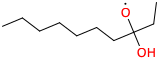

CCCCCC[CH]C(CC)OO <=> CCCCCCC(O)C([O])CC


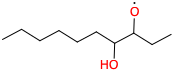

C[CH]C(CCCCCCC)OO <=> CCCCCCCC([O])C(C)O


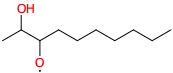

CCCCC[CH]CC(CC)OO <=> CCCCCC(O)CC([O])CC


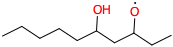

[CH2]CC(CCCCCCC)OO <=> CCCCCCCC([O])CCO


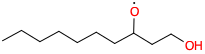

CCCC[CH]CCC(CC)OO <=> CCCCC(O)CCC([O])CC


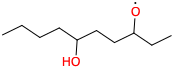

CCCCC[C](CCCC)OO <=> CCCCCC([O])(O)CCCC


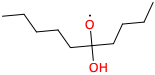

CCCC[CH]C(CCCC)OO <=> CCCCC([O])C(O)CCCC


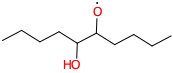

CCC[CH]C(CCCCC)OO <=> CCCCCC([O])C(O)CCC


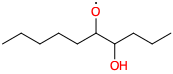

CCC[CH]CC(CCCC)OO <=> CCCCC([O])CC(O)CCC


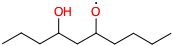

CCCCCCC[CH]C(C)OO <=> CCCCCCCC(O)C(C)[O]


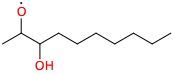

CC[CH]CC(CCCCC)OO <=> CCCCCC([O])CC(O)CC


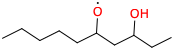

CCCCCC[C](CCC)OO <=> CCCCCCC([O])(O)CCC


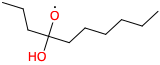

CCCCC[CH]C(CCC)OO <=> CCCCCC(O)C([O])CCC


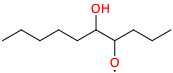

CC[CH]C(CCCCCC)OO <=> CCCCCCC([O])C(O)CC


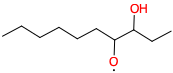

CCCC[CH]CC(CCC)OO <=> CCCCC(O)CC([O])CCC


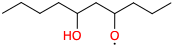

C[CH]CC(CCCCCC)OO <=> CCCCCCC([O])CC(C)O


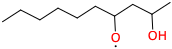

CCC[CH]CCC(CCC)OO <=> CCCC([O])CCC(O)CCC


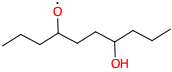

[CH2]CCC(CCCCCC)OO <=> CCCCCCC([O])CCCO


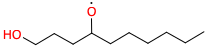

CC[CH]CCC(CCCC)OO <=> CCCCC([O])CCC(O)CC


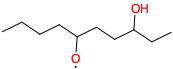

In [26]:
# intra_OH_migration can happen to QOOH
# Not sure it's helpful for low-T chemistry
# So we won't actually save them, but this is what they'd look like
print("Applying intra_OH_migration to QOOH")
for s in molecules['QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='intra_OH_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        # molecules['weird'].add(m)

In [27]:
# Here is what we've made
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CCCCCCCCCC")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="CCCC[CH]CCCCC"),
              Molecule(smiles="CCC[CH]CCCCCC"),
              Molecule(smiles="[CH2]CCCCCCCCC"),
              Molecule(smiles="C[CH]CCCCCCCC"),
              Molecule(smiles="CC[CH]CCCCCCC")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CCCCCCCCC(C)O[O]"),
              Molecule(smiles="CCCCCCCC(CC)O[O]"),
              Molecule(smiles="CCCCCC(CCCC)O[O]"),
              Molecule(smiles="CCCCCCCCCCO[O]"),
              Molecule(smiles="CCCCCCC(CCC)O[O]")},
             'QOOH': {Molecule(smiles="C[CH]CCC(CCCCC)OO"),
              Molecule(smiles="C[CH]CCCC(CCCC)OO"),
              Molecule(smiles="[CH2]CCCC(CCCCC)OO"),
              Molecule(smiles="[CH2]CCCCC(CCCC)OO"),
              Molecule(smiles="CCCCCCCCC[CH]OO"),
              Molecule(smiles="CCCCCCCC[CH]COO"),
           

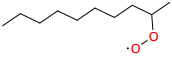

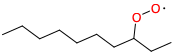

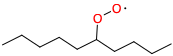

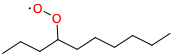

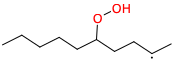

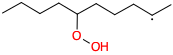

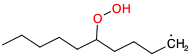

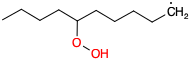

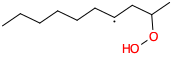

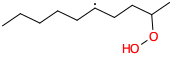

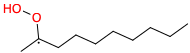

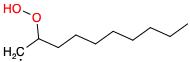

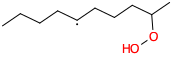

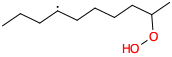

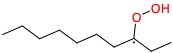

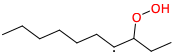

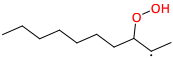

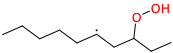

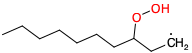

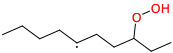

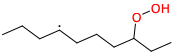

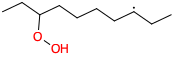

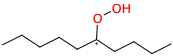

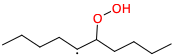

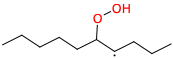

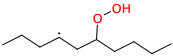

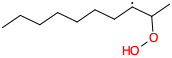

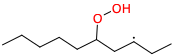

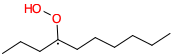

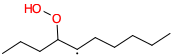

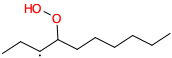

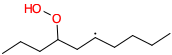

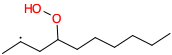

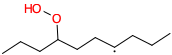

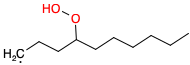

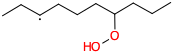

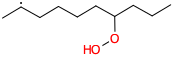

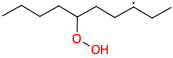

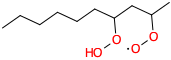

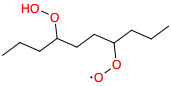

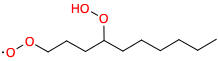

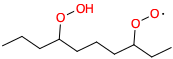

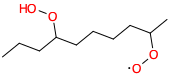

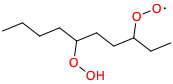

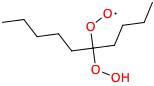

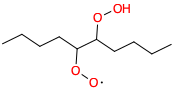

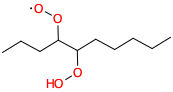

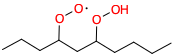

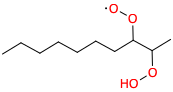

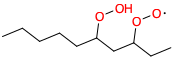

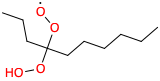

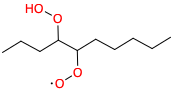

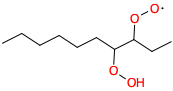

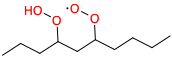

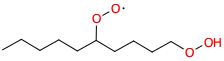

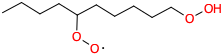

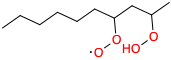

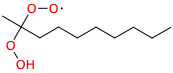

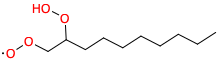

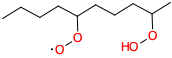

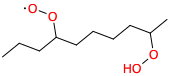

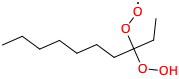

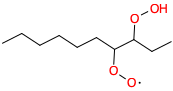

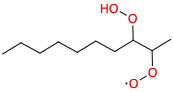

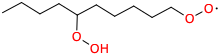

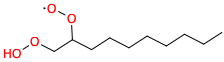

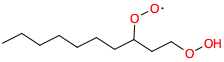

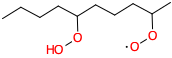

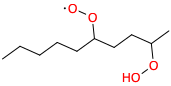

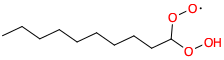

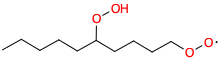

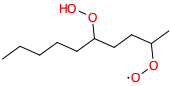

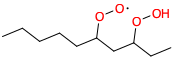

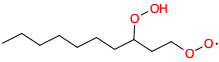

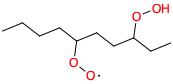

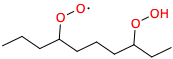

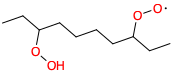

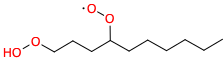

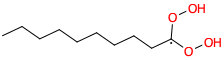

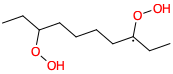

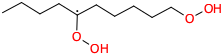

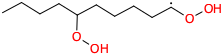

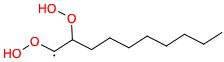

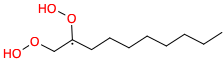

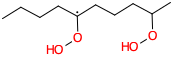

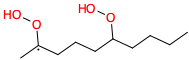

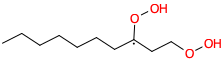

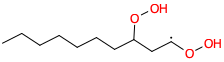

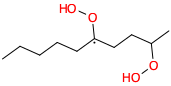

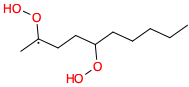

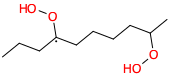

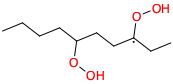

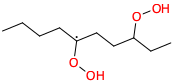

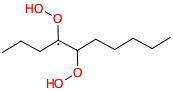

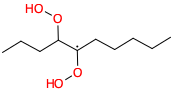

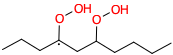

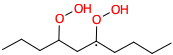

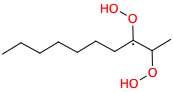

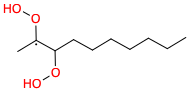

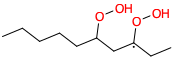

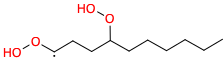

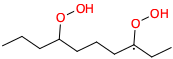

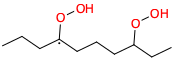

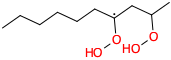

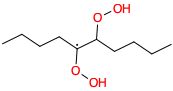

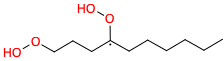

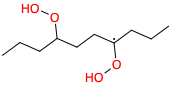

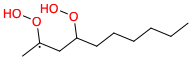

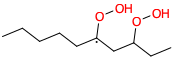

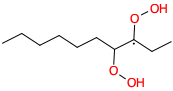

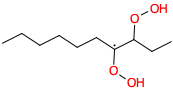

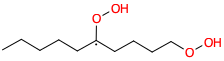

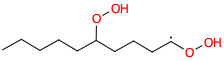

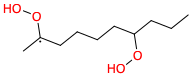

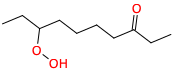

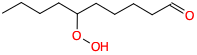

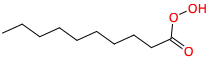

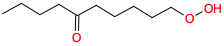

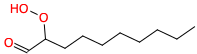

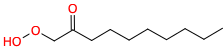

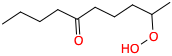

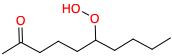

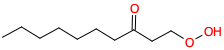

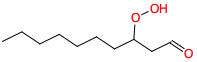

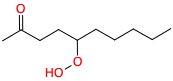

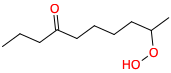

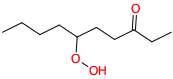

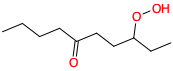

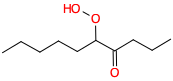

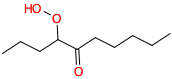

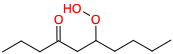

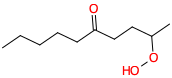

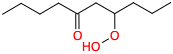

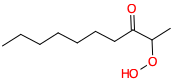

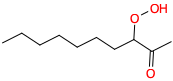

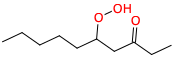

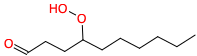

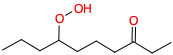

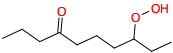

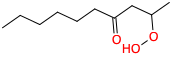

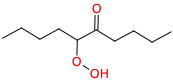

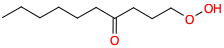

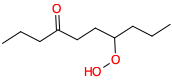

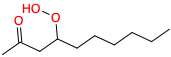

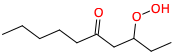

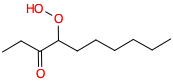

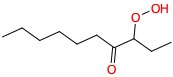

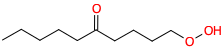

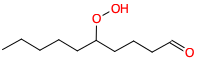

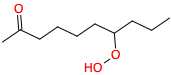

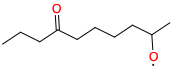

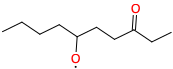

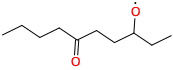

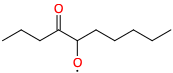

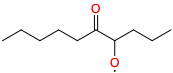

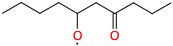

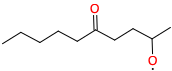

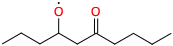

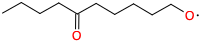

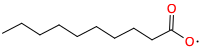

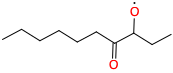

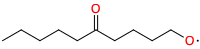

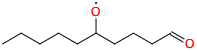

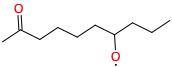

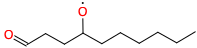

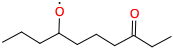

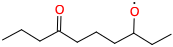

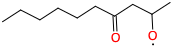

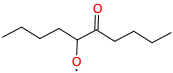

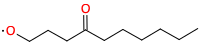

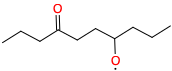

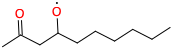

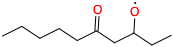

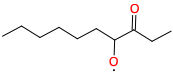

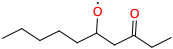

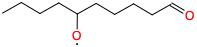

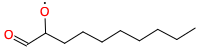

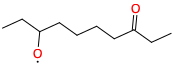

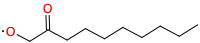

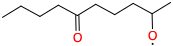

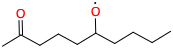

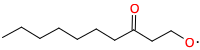

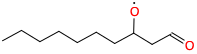

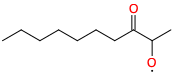

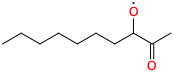

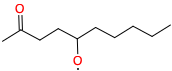

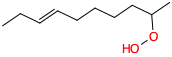

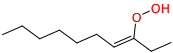

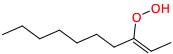

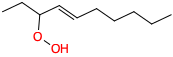

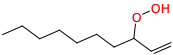

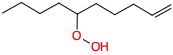

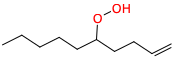

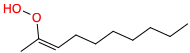

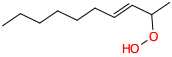

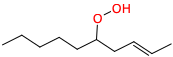

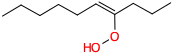

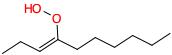

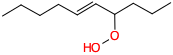

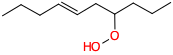

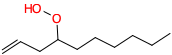

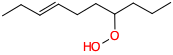

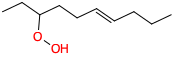

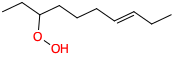

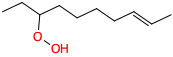

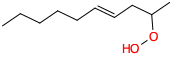

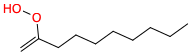

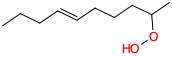

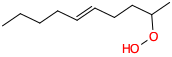

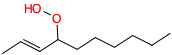

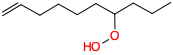

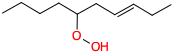

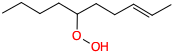

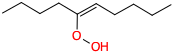

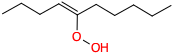

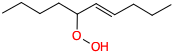

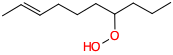

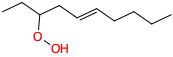

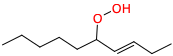

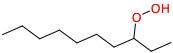

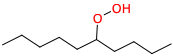

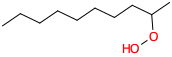

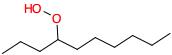

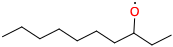

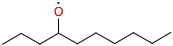

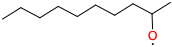

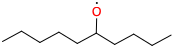

In [28]:
_=[ display(m) for s in molecules.values() for m in s]

In [29]:
molecules.keys()

dict_keys(['fuel', 'H', 'R', 'O2', 'ROO', 'QOOH', 'O2QOOH', 'HOOQjOOH', 'ketohydroperoxide', 'alkoxy_radical', 'OH', 'QeneOOH', 'ROOH', 'RO'])

In [30]:
import datetime
datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2019-11-07 10:49:01'

In [31]:

# Print them out for an RMG input file

print(f"""
######################################
# RMG input file species block
# Generated on {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
# to help discover the low temperature combustion of:
#   {', '.join([m.to_smiles() for m in molecules['fuel']])}
######################################
""")

special = 'OH H O2'.split()

print('#'*30)
print(f'# Small molecules')
for name in special:
    mols = molecules[name]
    for i, m in enumerate(mols):
        print(f"species(label='{name}', reactive=True, structure=SMILES('{m.to_smiles()}'))")
        
for name,mols in molecules.items():
    
    if name in special:
        continue
    
    print('#'*30)
    print(f'# {name}')
    for i,m in enumerate(mols):
        print(f"species(label='{name}_{i+1}', reactive=True, structure=SMILES('{m.to_smiles()}'))")
    


######################################
# RMG input file species block
# Generated on 2019-11-07 10:49:01
# to help discover the low temperature combustion of:
#   CCCCCCCCCC
######################################

##############################
# Small molecules
species(label='OH', reactive=True, structure=SMILES('[OH]'))
species(label='H', reactive=True, structure=SMILES('[H]'))
species(label='O2', reactive=True, structure=SMILES('[O][O]'))
##############################
# fuel
species(label='fuel_1', reactive=True, structure=SMILES('CCCCCCCCCC'))
##############################
# R
species(label='R_1', reactive=True, structure=SMILES('CCCC[CH]CCCCC'))
species(label='R_2', reactive=True, structure=SMILES('CCC[CH]CCCCCC'))
species(label='R_3', reactive=True, structure=SMILES('[CH2]CCCCCCCCC'))
species(label='R_4', reactive=True, structure=SMILES('C[CH]CCCCCCCC'))
species(label='R_5', reactive=True, structure=SMILES('CC[CH]CCCCCCC'))
##############################
# ROO
species(label='R

species(label='alkoxy_radical_32', reactive=True, structure=SMILES('CCCCCCCC(=O)CC[O]'))
species(label='alkoxy_radical_33', reactive=True, structure=SMILES('CCCCCCCC([O])CC=O'))
species(label='alkoxy_radical_34', reactive=True, structure=SMILES('CCCCCCCC(=O)C(C)[O]'))
species(label='alkoxy_radical_35', reactive=True, structure=SMILES('CCCCCCCC([O])C(C)=O'))
species(label='alkoxy_radical_36', reactive=True, structure=SMILES('CCCCCC([O])CCC(C)=O'))
##############################
# QeneOOH
species(label='QeneOOH_1', reactive=True, structure=SMILES('CCC=CCCCCC(C)OO'))
species(label='QeneOOH_2', reactive=True, structure=SMILES('CCCCCCC=C(CC)OO'))
species(label='QeneOOH_3', reactive=True, structure=SMILES('CC=C(CCCCCCC)OO'))
species(label='QeneOOH_4', reactive=True, structure=SMILES('CCCCCC=CC(CC)OO'))
species(label='QeneOOH_5', reactive=True, structure=SMILES('C=CC(CCCCCCC)OO'))
species(label='QeneOOH_6', reactive=True, structure=SMILES('C=CCCCC(CCCC)OO'))
species(label='QeneOOH_7', reactiv